In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install --upgrade seaborn
import seaborn as sns
import matplotlib.pyplot as plt

!pip install heatmapz
from heatmap import heatmap, corrplot

/kaggle/input/frauddetect/sample_submission.csv
/kaggle/input/frauddetect/test_identity.csv
/kaggle/input/frauddetect/train_identity.csv
/kaggle/input/frauddetect/test_transaction.csv
/kaggle/input/frauddetect/train_transaction.csv
     |████████████████████████████████| 283 kB 4.4 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
txn = pd.read_csv('../input/frauddetect/train_transaction.csv', index_col='TransactionID')
# test_txn = pd.read_csv('../input/frauddetect/test_transaction.csv')

In [4]:
txn

isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987002              0          86469          59.000         W   4663  490.0   
2987003              0          86499          50.000         W  18132  567.0   
2987005              0          86510          49.000         W   5937  555.0   
2987006              0          86522         159.000         W  12308  360.0   
2987008              0          86535          15.000         H   2803  100.0   
...                ...            ...             ...       ...    ...    ...   
3577529              0       15810912          73.838         C   5096  555.0   
3577531              0       15810935         400.000         R   6019  583.0   
3577537              0       15811079          30.950         W  12037  595.0   
3577538              0       15811088         117.000         W   7826  481.0   
3577539              0       15811131         279.950         W  15066  170.0   

               card3       card4  card5   card6  ...  V330  V331  V332  V333  \
TransactionID                                    ...                           
2987002        150.0        visa  166.0   debit  ...   NaN   NaN   NaN   NaN   
2987003        150.0  mastercard  117.0   debit  ...   NaN   NaN   NaN   NaN   
2987005        150.0        visa  226.0   debit  ...   NaN   NaN   NaN   NaN   
2987006        150.0        visa  166.0   debit  ...   NaN   NaN   NaN   NaN   
2987008        150.0        visa  226.0   debit  ...   0.0   0.0   0.0   0.0   
...              ...         ...    ...     ...  ...   ...   ...   ...   ...   
3577529        185.0  mastercard  137.0  credit  ...   NaN   NaN   NaN   NaN   
3577531        150.0        visa  226.0  credit  ...   0.0   0.0   0.0   0.0   
3577537        150.0  mastercard  224.0   debit  ...   NaN   NaN   NaN   NaN   
3577538        150.0  mastercard  224.0   debit  ...   NaN   NaN   NaN   NaN   
3577539        150.0  mastercard  102.0  credit  ...   NaN   NaN   NaN   NaN   

              V334 V335  V336  V337  V338  V339  
TransactionID                                    
2987002        NaN  NaN   NaN   NaN   NaN   NaN  
2987003        NaN  NaN   NaN   NaN   NaN   NaN  
2987005        NaN  NaN   NaN   NaN   NaN   NaN  
2987006        NaN  NaN   NaN   NaN   NaN   NaN  
2987008        0.0  0.0   0.0   0.0   0.0   0.0  
...            ...  ...   ...   ...   ...   ...  
3577529        NaN  NaN   NaN   NaN   NaN   NaN  
3577531        0.0  0.0   0.0   0.0   0.0   0.0  
3577537        NaN  NaN   NaN   NaN   NaN   NaN  
3577538        NaN  NaN   NaN   NaN   NaN   NaN  
3577539        NaN  NaN   NaN   NaN   NaN   NaN  

[354324 rows x 393 columns]

In [5]:
nans = txn.isna().sum()
nans

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
V335              304595
V336              304595
V337              304595
V338              304595
V339              304595
Length: 393, dtype: int64

In [6]:
nans_dict = {}

for row in nans.iteritems():
    try:
        nans_dict[str(row[1])].append( row[0] )
    except:
        nans_dict[str(row[1])] = [row[0]]

In [7]:
print( sorted([int(i) for i in nans_dict.keys()]) )

[0, 7, 190, 784, 992, 997, 1000, 2577, 5421, 39482, 45853, 45878, 46513, 53713, 53743, 56750, 101743, 101774, 101936, 157985, 162794, 167714, 168770, 168882, 186339, 207868, 207878, 210340, 211467, 269066, 270033, 270138, 271597, 275667, 304595, 304832, 304836, 309214, 310333, 315477, 316849, 317080, 330931, 331717]


In [8]:
for key, val in nans_dict.items():
    print(f"Number of NULLS: {key}\n {val}\n")

Number of NULLS: 0
 ['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

Number of NULLS: 5421
 ['card2']

Number of NULLS: 992
 ['card3']

Number of NULLS: 1000
 ['card4']

Number of NULLS: 2577
 ['card5']

Number of NULLS: 997
 ['card6']

Number of NULLS: 39482
 ['addr1', 'addr2']

Number of NULLS: 211467
 ['dist1']

Number of NULLS: 331717
 ['dist2']

Number of NULLS: 56750
 ['P_emaildomain']

Number of NULLS: 271597
 ['R_emaildomain']

Number of NULLS: 784
 ['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']

Number of NULLS: 168770
 ['D2']

Number of NULLS: 157985
 ['D3']

Number of NULLS: 101743
 ['D4']

Number of NULLS: 186339
 ['D5']

Number of NULLS: 310333
 ['D6']

Number of NULLS: 330931
 ['D7']

Number of NULLS: 309214
 ['D8', 'D9']

Number of NULLS: 45853
 ['D10']

Number of NULLS: 167714
 ['D11', 'V1', 'V2', 'V3', 'V4', 'V5',

In [9]:
nans_groups = []
for l in nans_dict.values():
    if len(l) > 3:
        nans_groups.append(l)
nans_groups

[['isFraud',
  'TransactionDT',
  'TransactionAmt',
  'ProductCD',
  'card1',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14'],
 ['D1',
  'V281',
  'V282',
  'V283',
  'V288',
  'V289',
  'V296',
  'V300',
  'V301',
  'V313',
  'V314',
  'V315'],
 ['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
 ['V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34'],
 ['V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52'],
 ['V53',
  'V54',
  'V55',
  'V56',
  'V57',
  'V58',
  'V59',
  'V60',
  'V61',
  'V62',
  'V63',
  'V64',
  'V65',
  'V66',
  'V67',
  'V68',
  'V69',
  'V70',
  'V71',
  'V72',
  'V73',
  'V74'],
 ['V75',
  'V76',
  'V77',
  'V78',
 

In [10]:
def show_corr(lst):
#     plt.figure(figsize=(15,15))
    sns.set( font_scale = 1 )
    sns.heatmap( txn[lst].corr(), cmap='BrBG', annot=True, fmt='0.2f', square=True, linewidths = 2, vmin = -1, vmax = 1 )
#     pass
    

# 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'

In [11]:
final_cols = []

In [12]:
def max_value_counts(lst, final_cols):
    final = []
    for g in lst:
        gval = [len(txn[str(gg)].value_counts()) for gg in g]
        most_features_index = np.argmax(gval)
        final.append( g[most_features_index] )
    final_cols += final

In [ ]:
# cmaps = ['BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlGn', 'coolwarm']

# for c in cmaps:
#     show_corr(group_1, c)

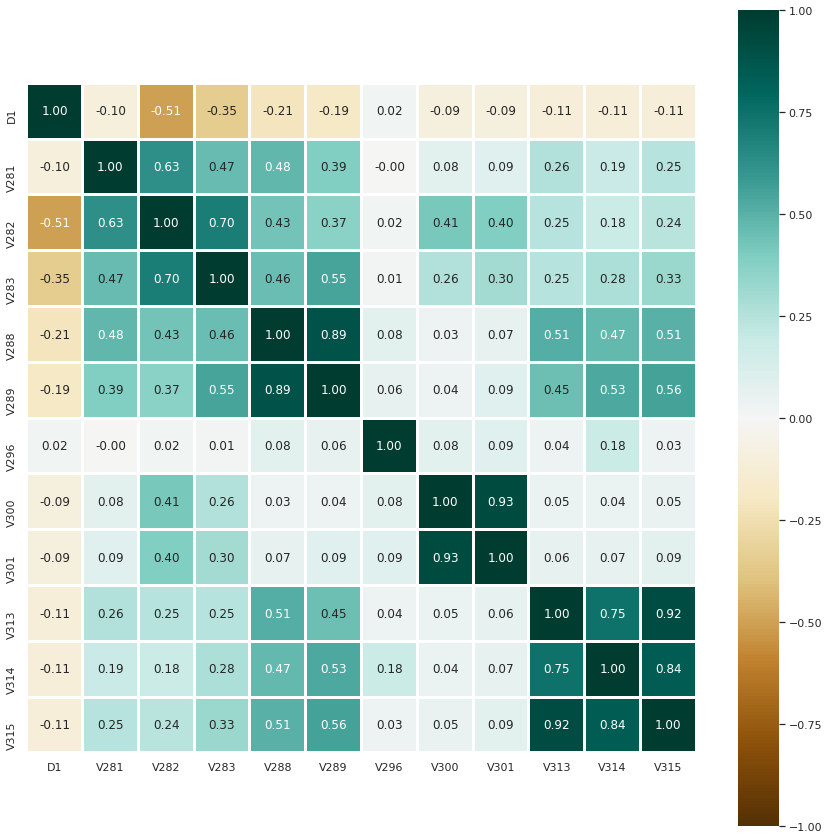

In [13]:
plt.figure( figsize=(15, 15) )
show_corr(nans_groups[1])

In [14]:
gcorr = [['D1'], ['V281'], ['V282'], ['V283'], ['V288', 'V289'], ['V296'], ['V300', 'V301'], ['V313', 'V314', 'V315']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314']


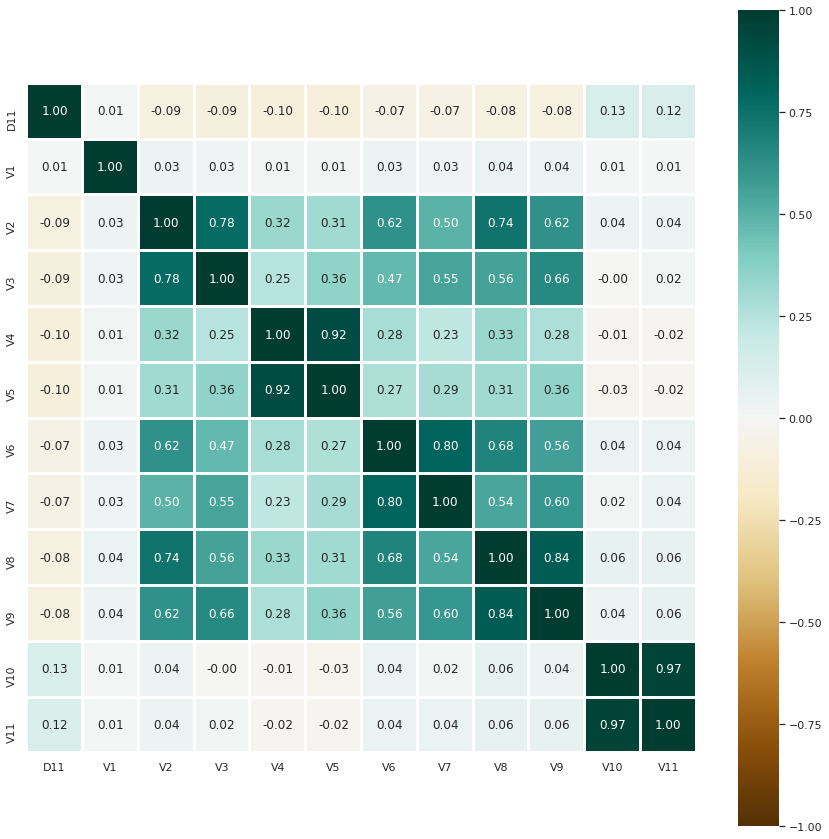

In [15]:
plt.figure( figsize=(15, 15) )
show_corr(nans_groups[2])

In [16]:
gcorr = [['D11'], ['V1'], ['V2', 'V3'], ['V4', 'V5'], ['V6', 'V7'], ['V8', 'V9'], ['V10', 'V11']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11']


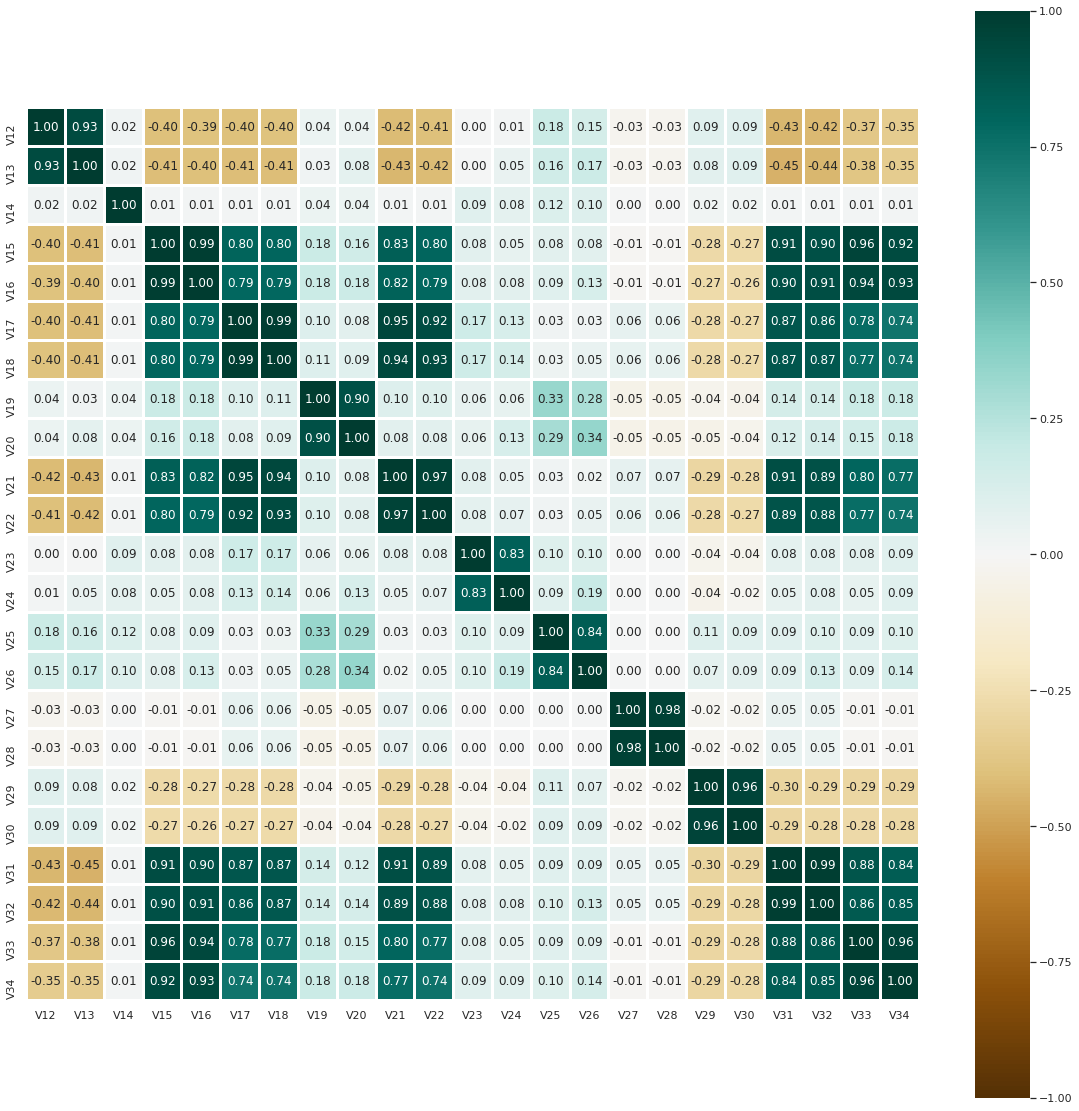

In [17]:
plt.figure( figsize=(20, 20) )
show_corr(nans_groups[3])

In [18]:
gcorr = [['V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V31', 'V32', 'V33', 'V34'], ['V14'], ['V20', 'V19'], ['V24', 'V23'], ['V26', 'V25'], ['V28', 'V27'], ['V29', 'V30']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30']


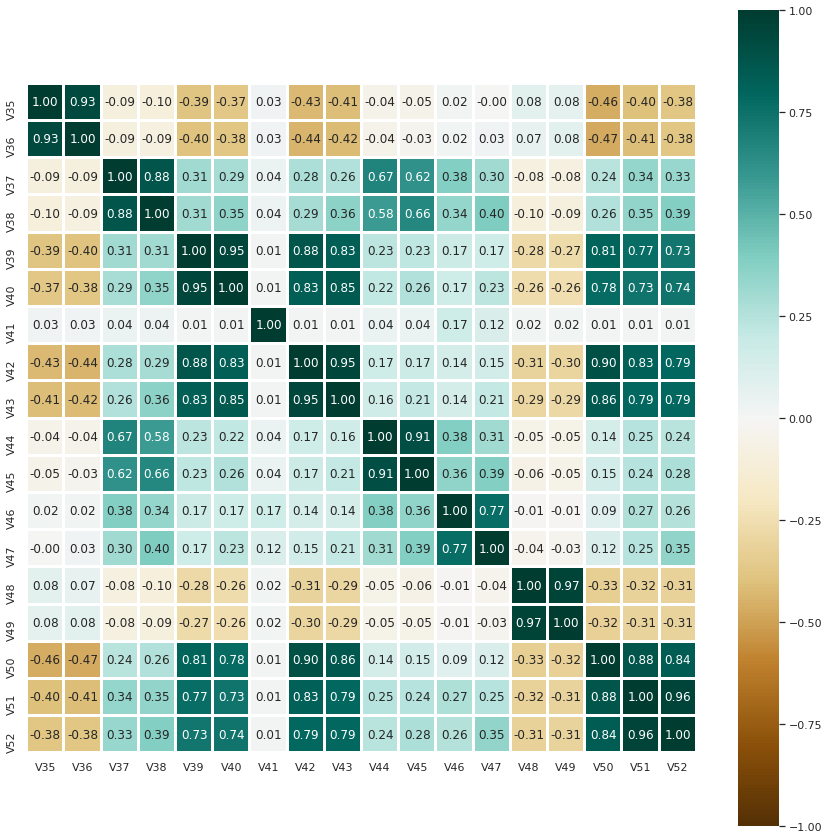

In [19]:
plt.figure( figsize=(15, 15) )
show_corr(nans_groups[4])

In [20]:
gcorr = [['V48', 'V49'], ['V41'], ['V35', 'V36'], ['V37', 'V38'], ['V39', 'V40', 'V42', 'V43', 'V50', 'V51', 'V52'], ['V44', 'V45'], ['V46', 'V47']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47']


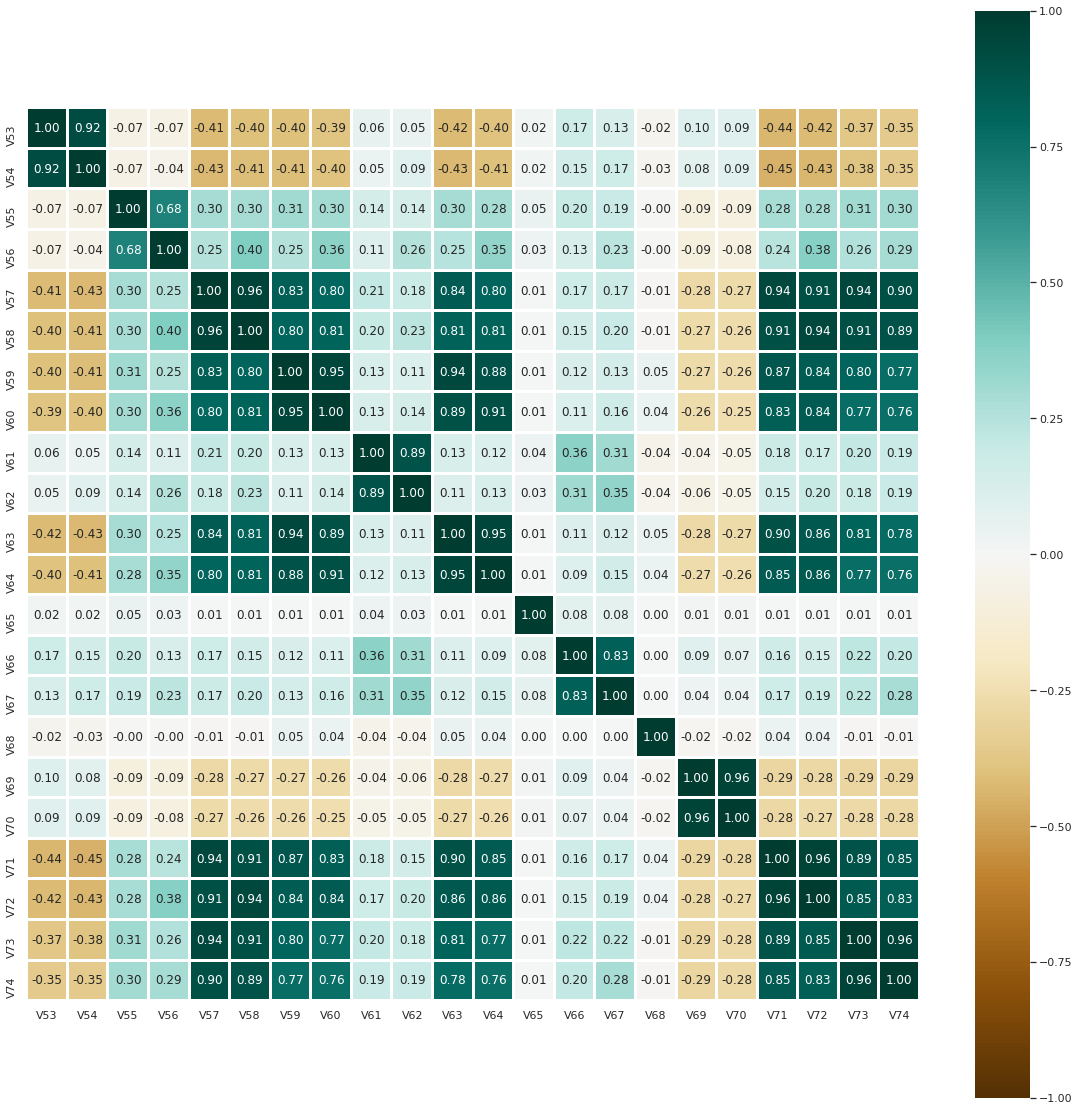

In [21]:
plt.figure( figsize=(20, 20) )
show_corr(nans_groups[5])

In [22]:
gcorr = [['V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'], ['V65'], ['V68'], ['V53', 'V54'], ['V55', 'V56'], ['V61', 'V62'], ['V66', 'V67'], ['V69', 'V70']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70']


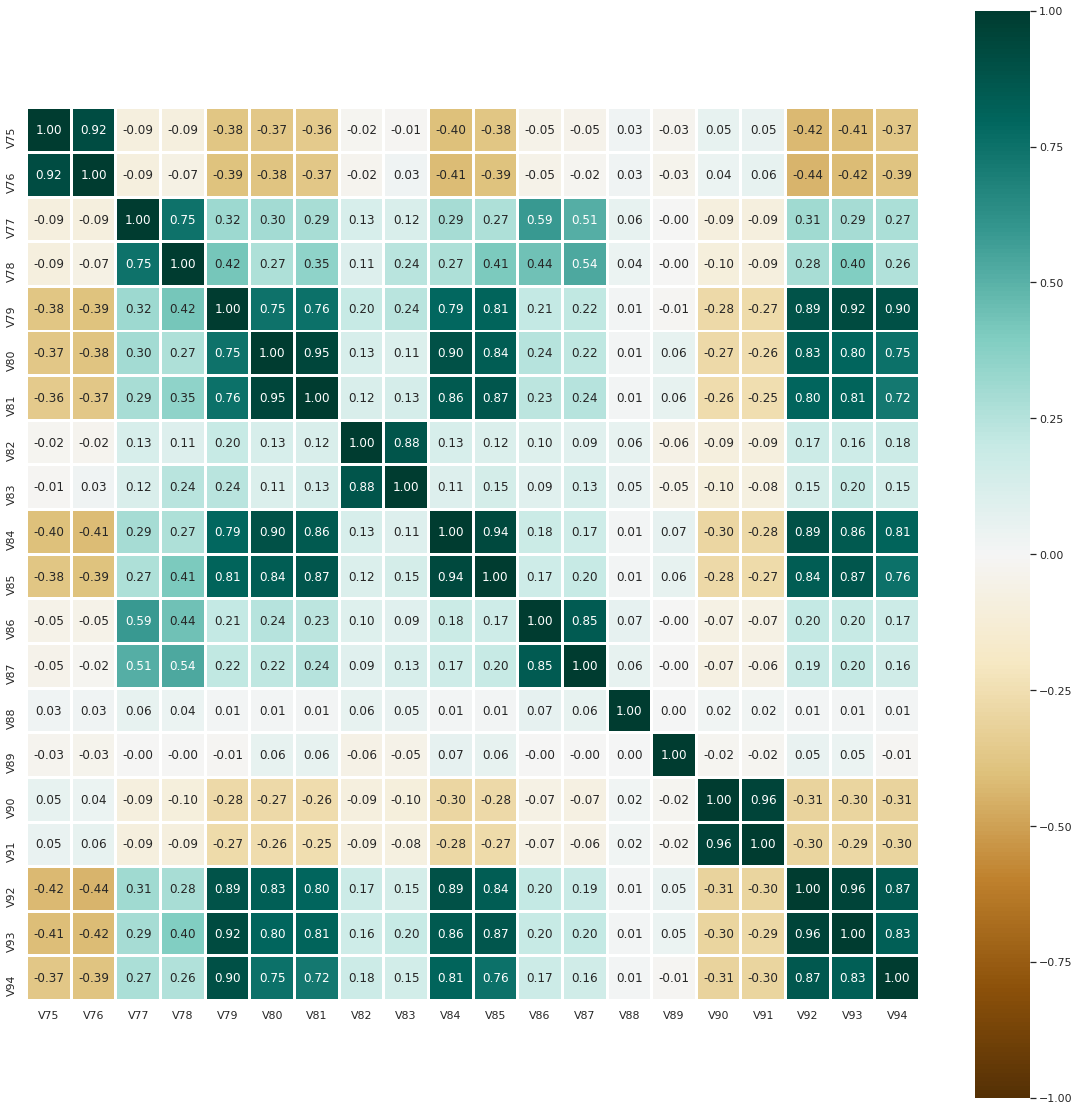

In [23]:
plt.figure( figsize=(20, 20) )
show_corr(nans_groups[6])

In [24]:
gcorr = [['V79', 'V80', 'V81', 'V84', 'V85', 'V92', 'V93', 'V94'], ['V88'], ['V89'], ['V75', 'V76'], ['V77', 'V78'], ['V82', 'V83'], ['V86', 'V87'], ['V90', 'V91']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91']


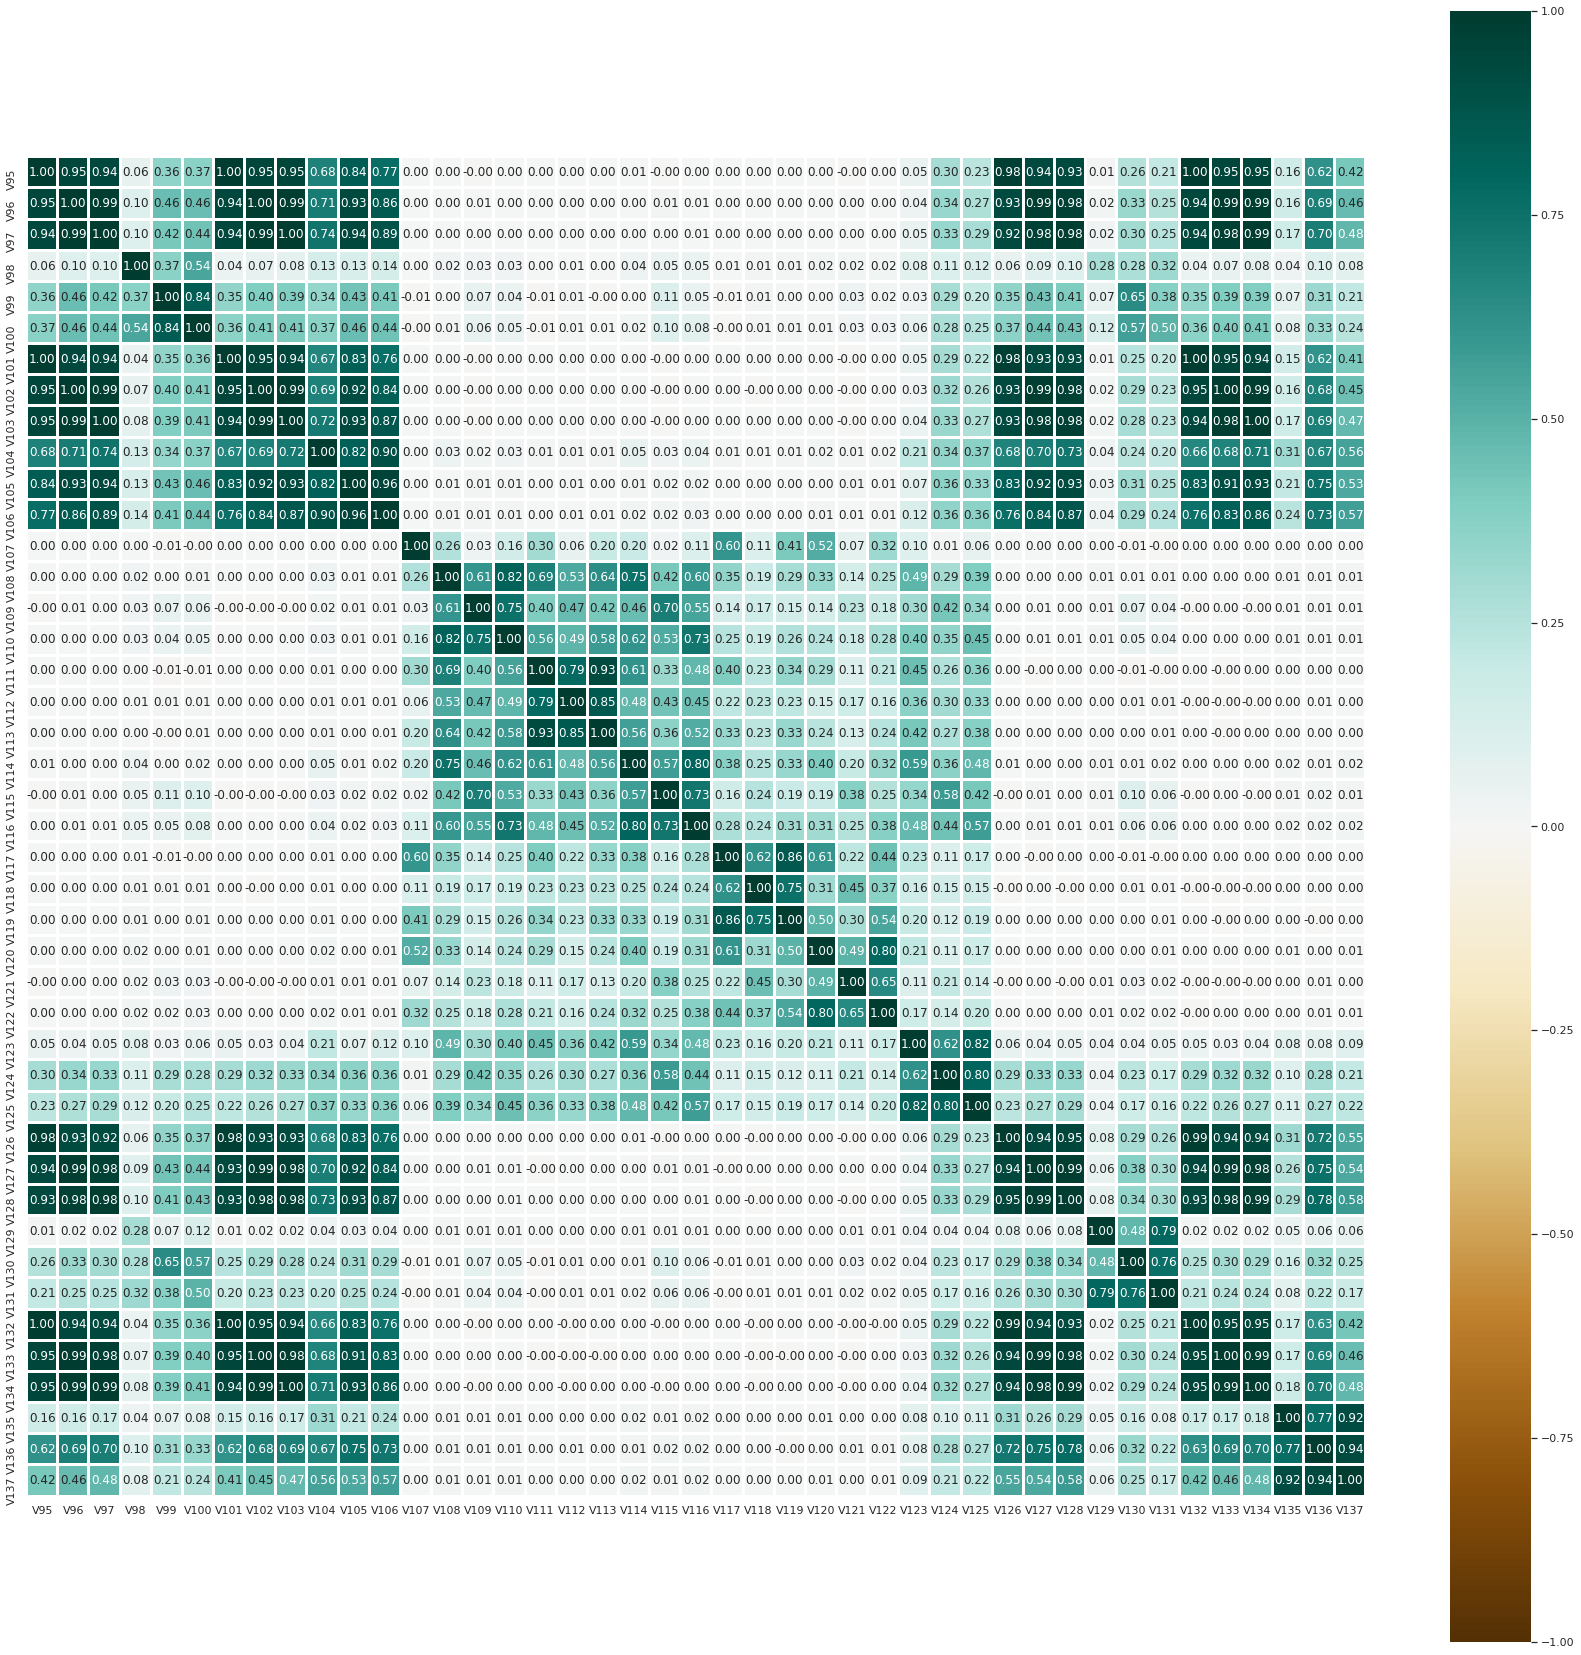

In [25]:
plt.figure( figsize=(30,30))
show_corr(nans_groups[7])

In [26]:
gcorr = [['V95', 'V96', 'V97', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134'], ['V98'], ['V107'],
         ['V100', 'V99'], ['V108', 'V109', 'V110', 'V114', 'V116'], ['V111', 'V112', 'V113'], ['V115'], ['V118', 'V117', 'V119'], ['V120', 'V122'], ['V121'],
         ['V123', 'V124', 'V125'], ['V129', 'V131'], ['V130'], ['V135', 'V136', 'V137']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136']


In [27]:
for i in nans_groups:
    print(len(i))

19
12
12
23
18
22
20
43
18
11
31
19
46
16
32
18


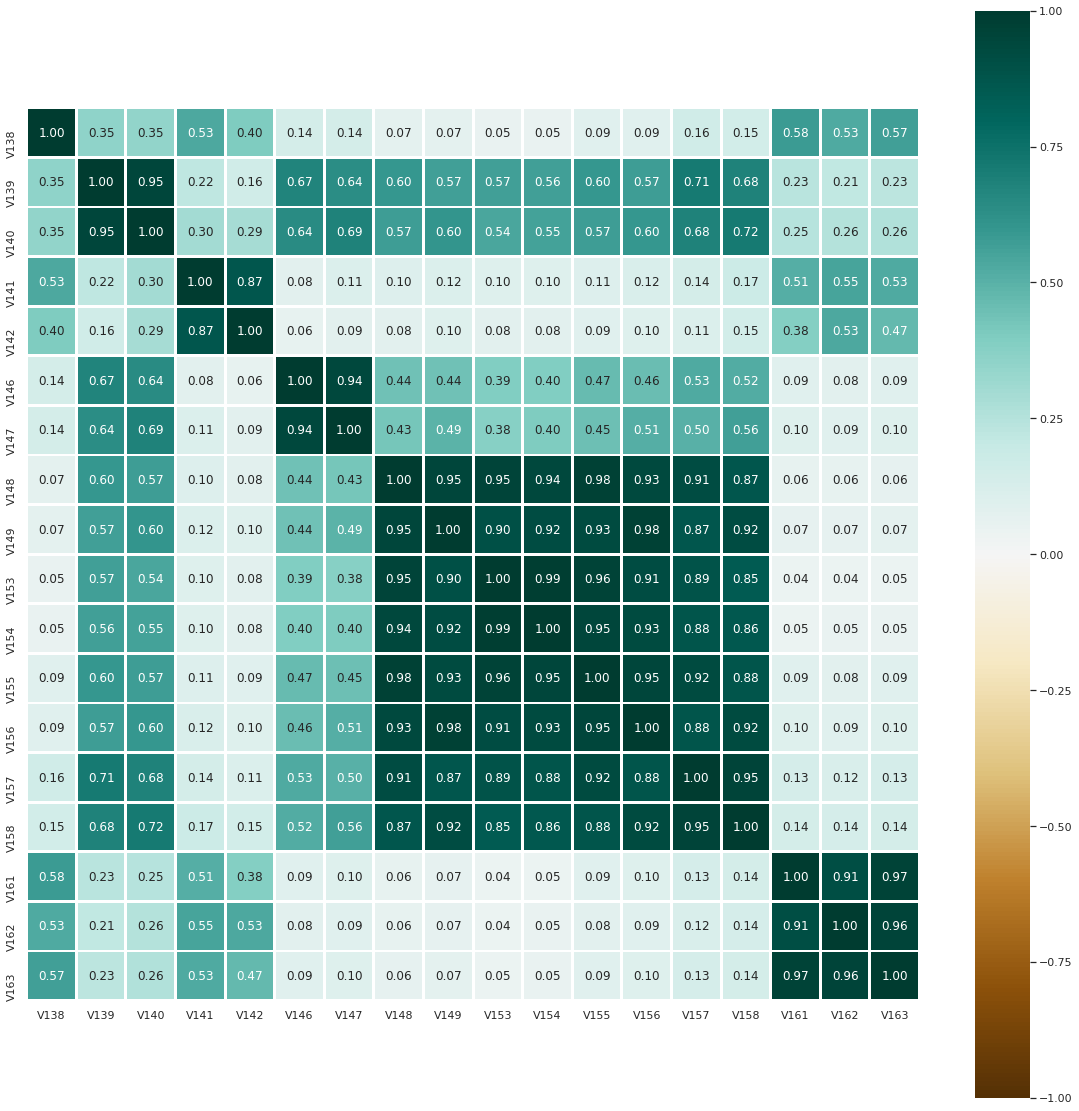

In [28]:
plt.figure( figsize=(20,20))
show_corr(nans_groups[8])

In [29]:
gcorr = [ ['V138'], ['V139', 'V140'], ['V141', 'V142'], ['V146', 'V147'], ['V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158'], ['V161', 'V162', 'V163']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162']


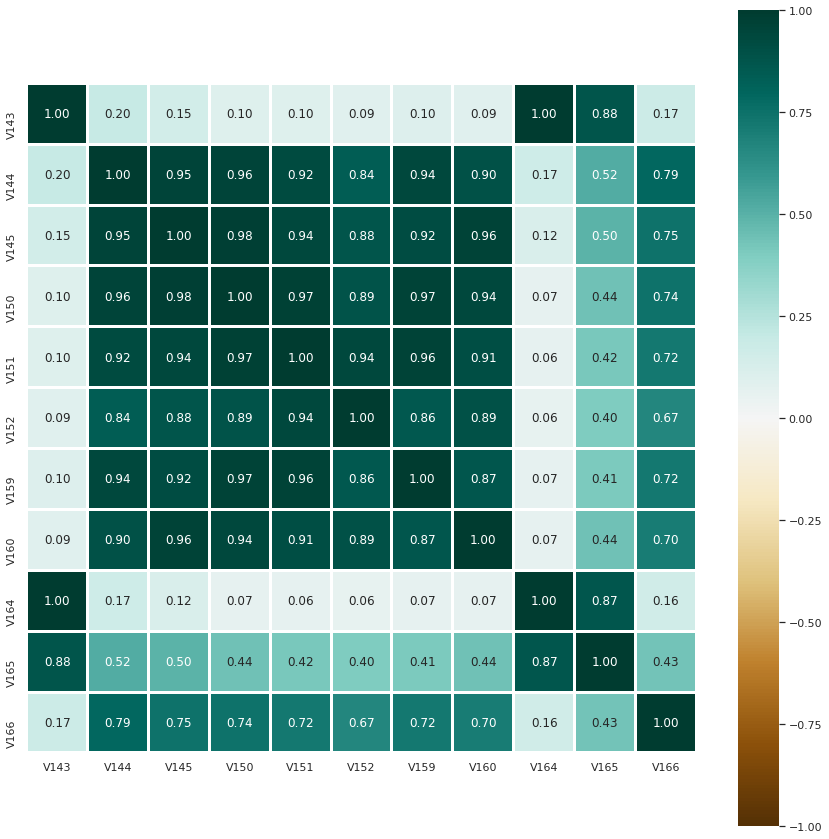

In [30]:
# 11 31 19
plt.figure( figsize=(15,15))
show_corr(nans_groups[9])

In [31]:
gcorr = [['V143'], ['V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160'], ['V164', 'V165'], ['V166']]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166']


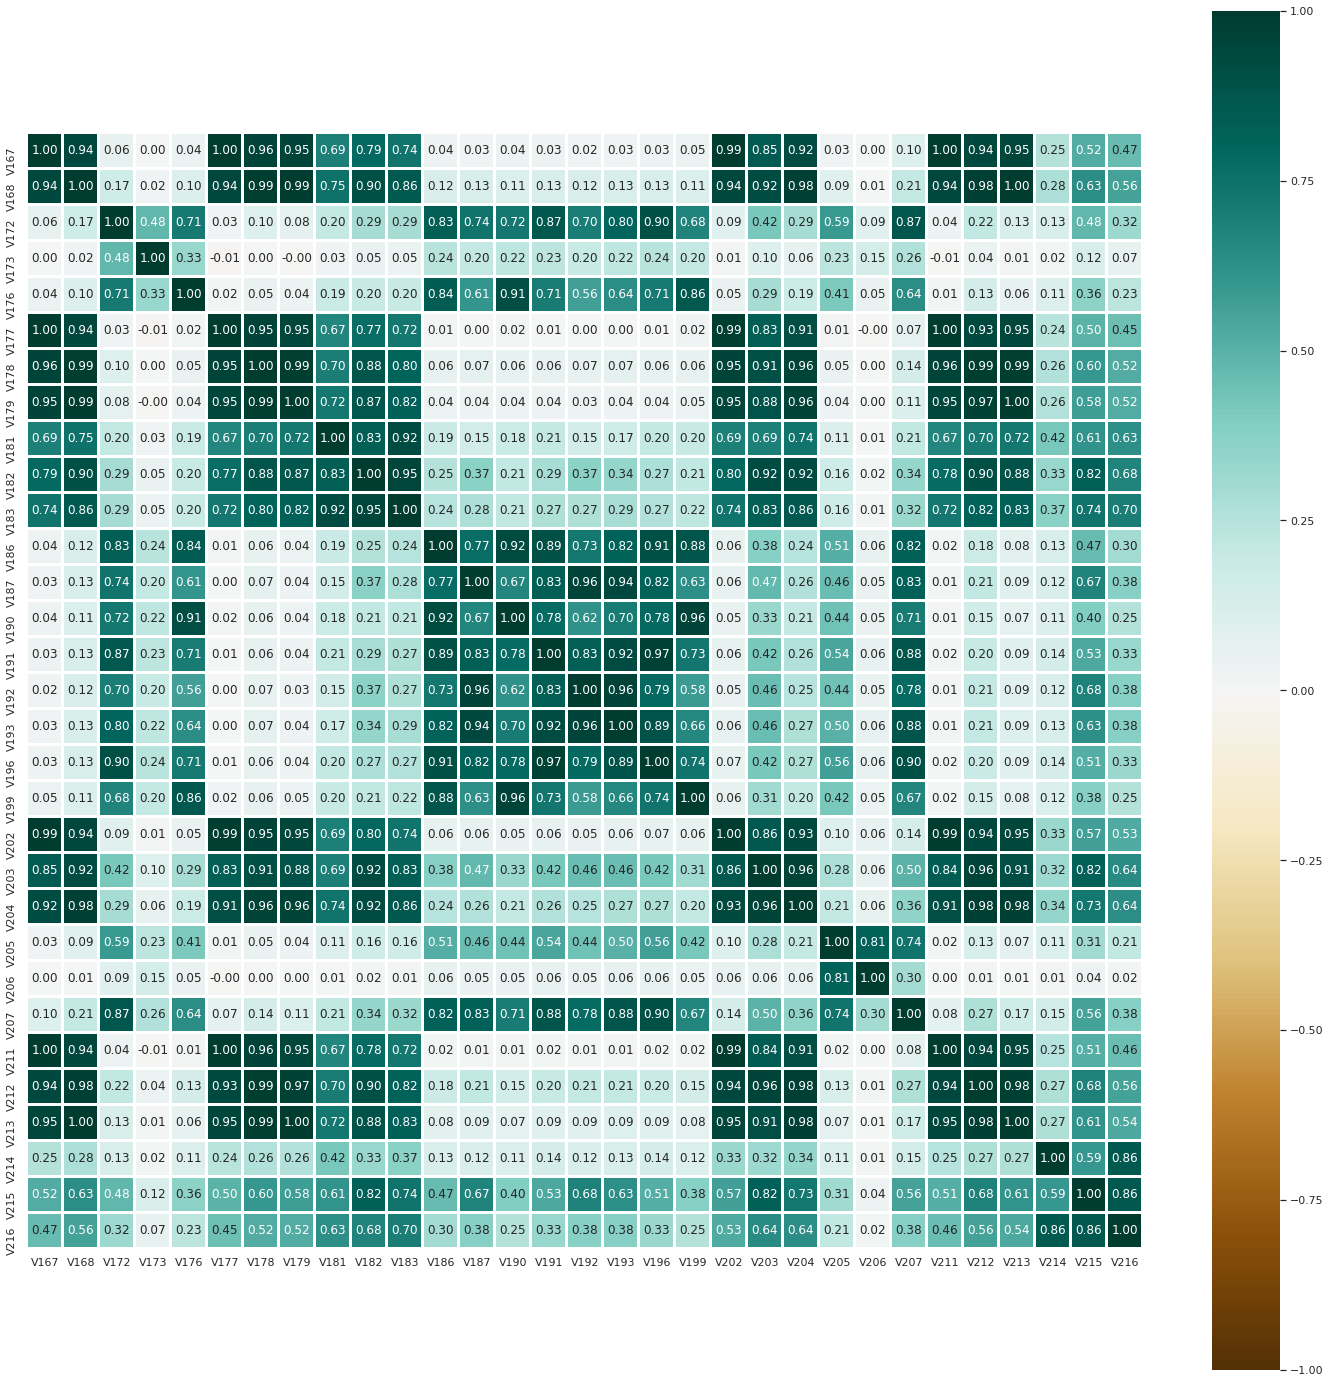

In [32]:
plt.figure( figsize=(25,25))
show_corr(nans_groups[10])

In [33]:
gcorr = [
         ['V167', 'V168', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V202', 'V203', 'V204', 'V211', 'V212', 'V213'],
         ['V172', 'V186', 'V207', 'V191', 'V196', 'V174', 'V190', 'V199', 'V176', 'V193', 'V192', 'V193', 'V187'], ['V173'], ['V205', 'V206'],
         ['V214', 'V215', 'V216']
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215']


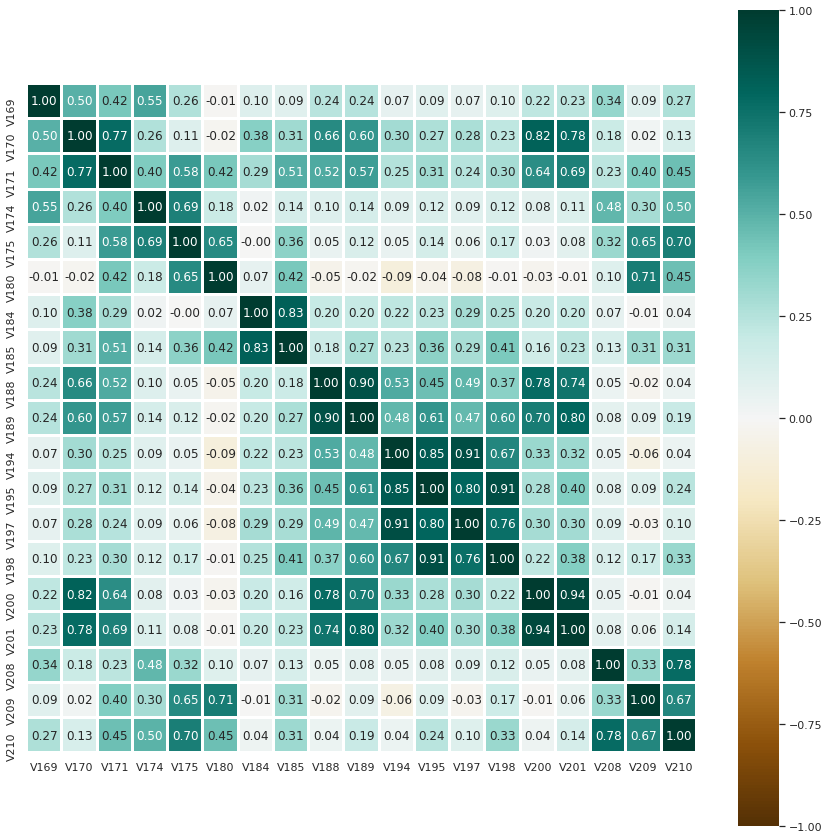

In [34]:
#19, 46, 16 32, 18
plt.figure( figsize=(15,15))
show_corr(nans_groups[11])

In [35]:
gcorr = [
         ['V169'],
         ['V170', 'V200', 'V201'], 
         ['V171'],
         ['V174'],
         ['V175'],
         ['V180'],
         ['V184', 'V185'],
         ['V188', 'V189'],
         ['V194', 'V195', 'V197', 'V198'],
         ['V208', 'V210'],
         ['V209']
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209']


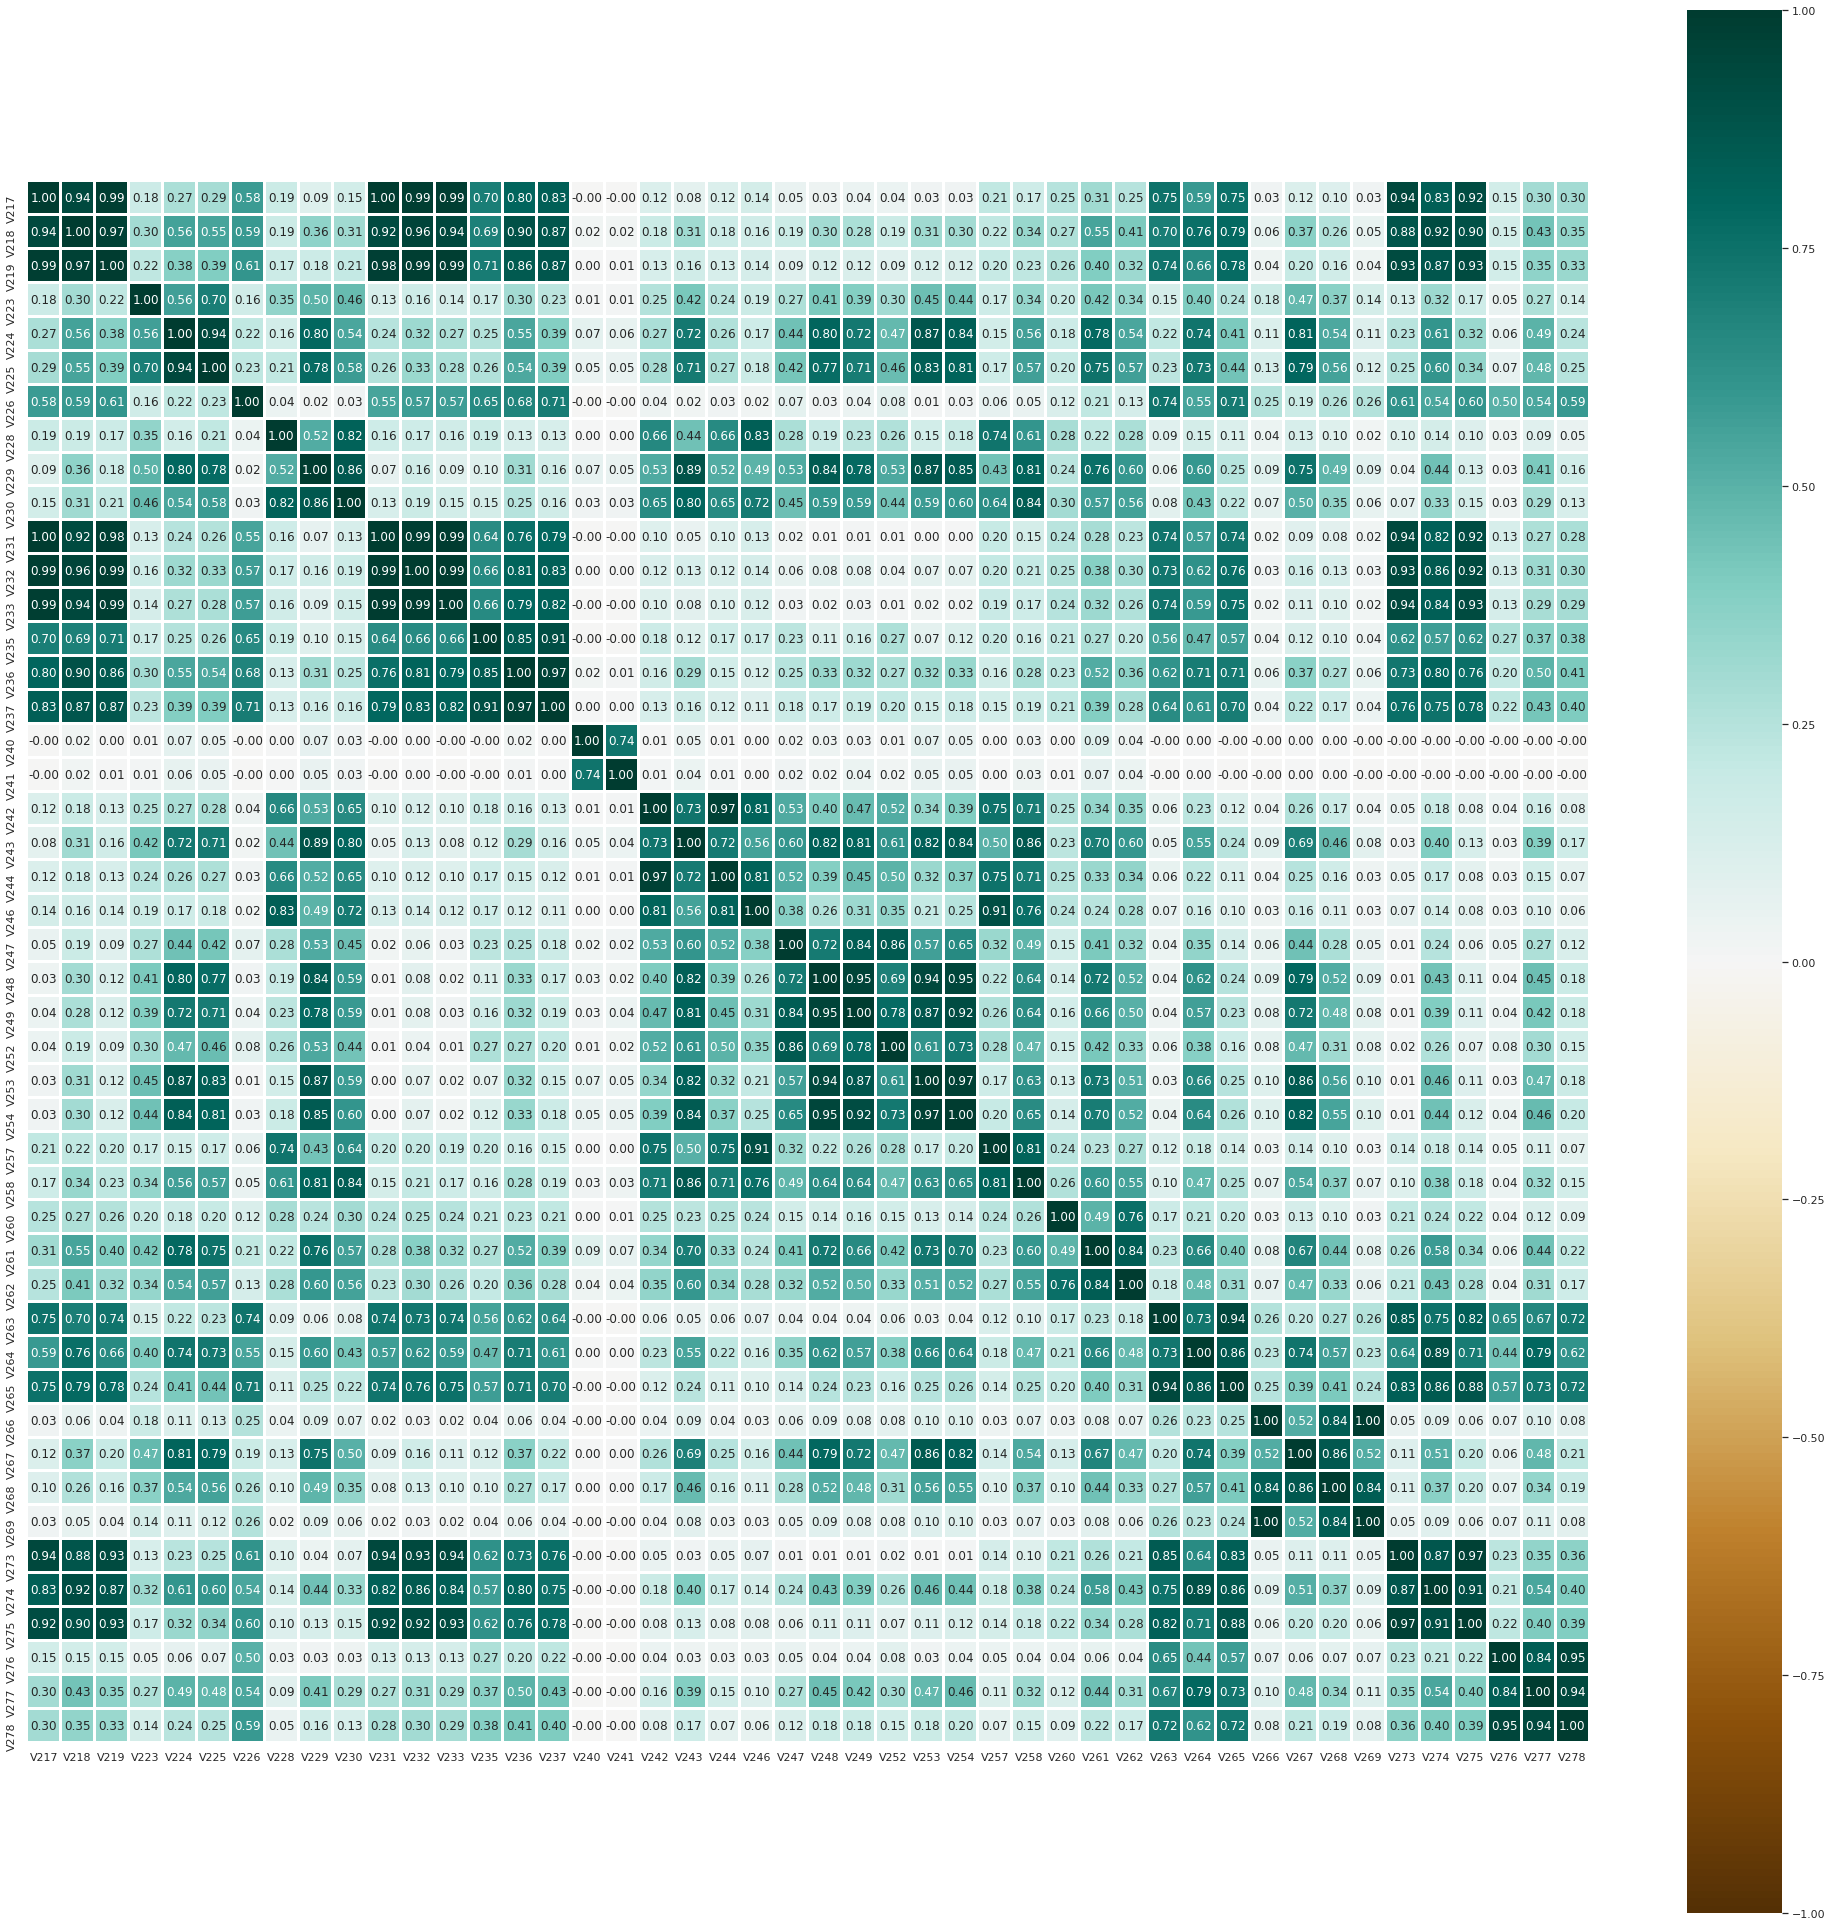

In [36]:
plt.figure( figsize=(35,35))
# plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
show_corr(nans_groups[12])

In [37]:
gcorr = [
         ['V217', 'V218', 'V219', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V273', 'V274', 'V275'],
         ['V224', 'V225', 'V253', 'V254', 'V267', 'V228', 'V229', 'V230', 'V243', 'V246', 'V248', 'V249', 'V257', 'V258', 'V247', 'V249', 'V252'], 
         ['V226'],
         ['V223'],
         ['V240', 'V241'],
         ['V242', 'V244'],
         ['V260'],
         ['V261', 'V262'],
         ['V263', 'V264', 'V265'],
         ['V266', 'V268', 'V269'],
         ['V276', 'V278'],
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V274', 'V267', 'V226', 'V223', 'V240', 'V244', 'V260', 'V261', 'V264', 'V268', 'V278']


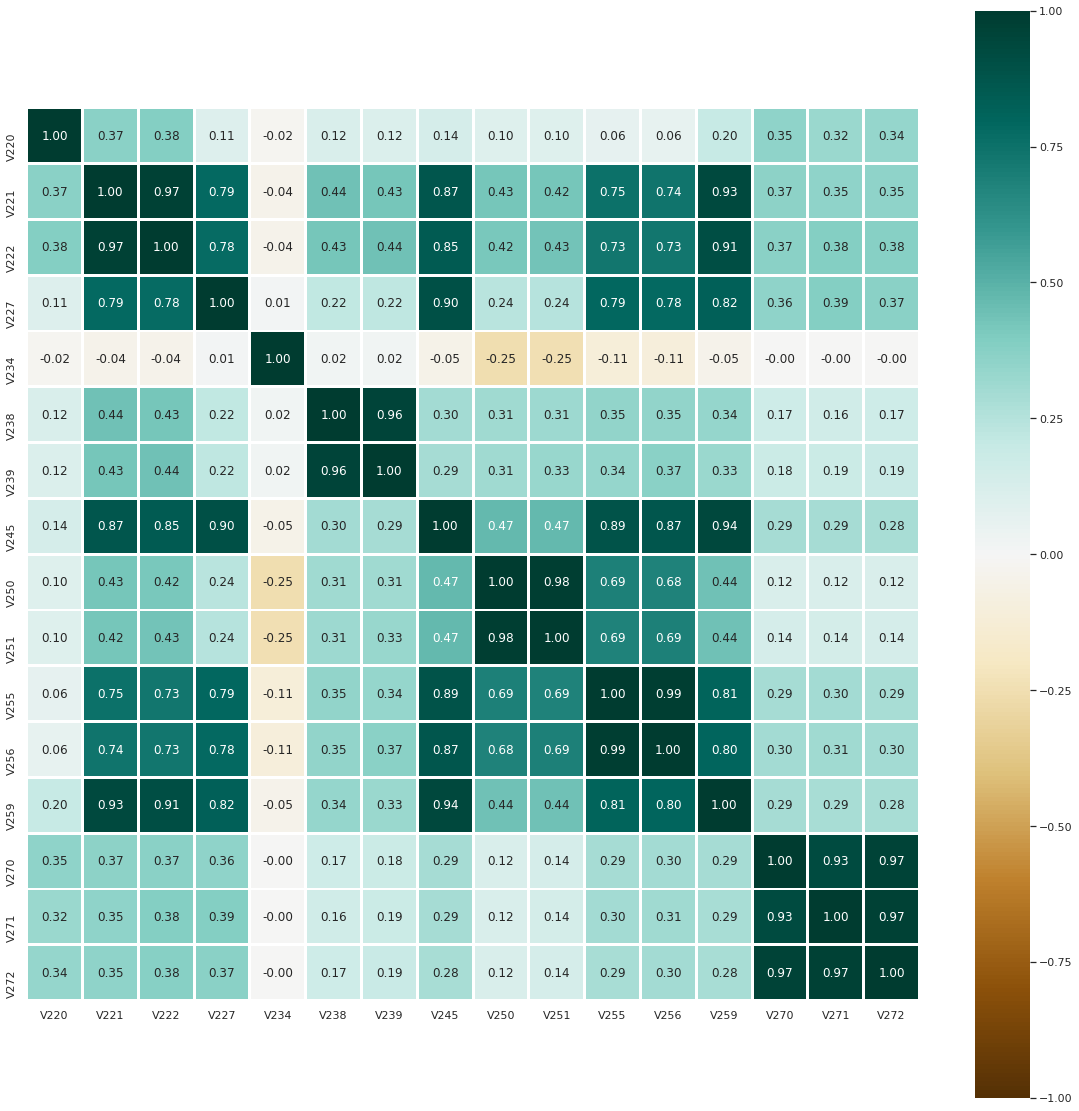

In [38]:
# 16 32 18
plt.figure( figsize=(20,20))
show_corr(nans_groups[13])

In [39]:
gcorr = [
         ['V221', 'V222', 'V227', 'V245', 'V255', 'V256', 'V259'],
         ['V238', 'V239'], 
         ['V250', 'V251'],
         ['V234'],
         ['V220'],
         ['V270', 'V271', 'V272'],
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V274', 'V267', 'V226', 'V223', 'V240', 'V244', 'V260', 'V261', 'V264', 'V268', 'V278', 'V222', 'V238', 'V251', 'V234', 'V220', 'V271']


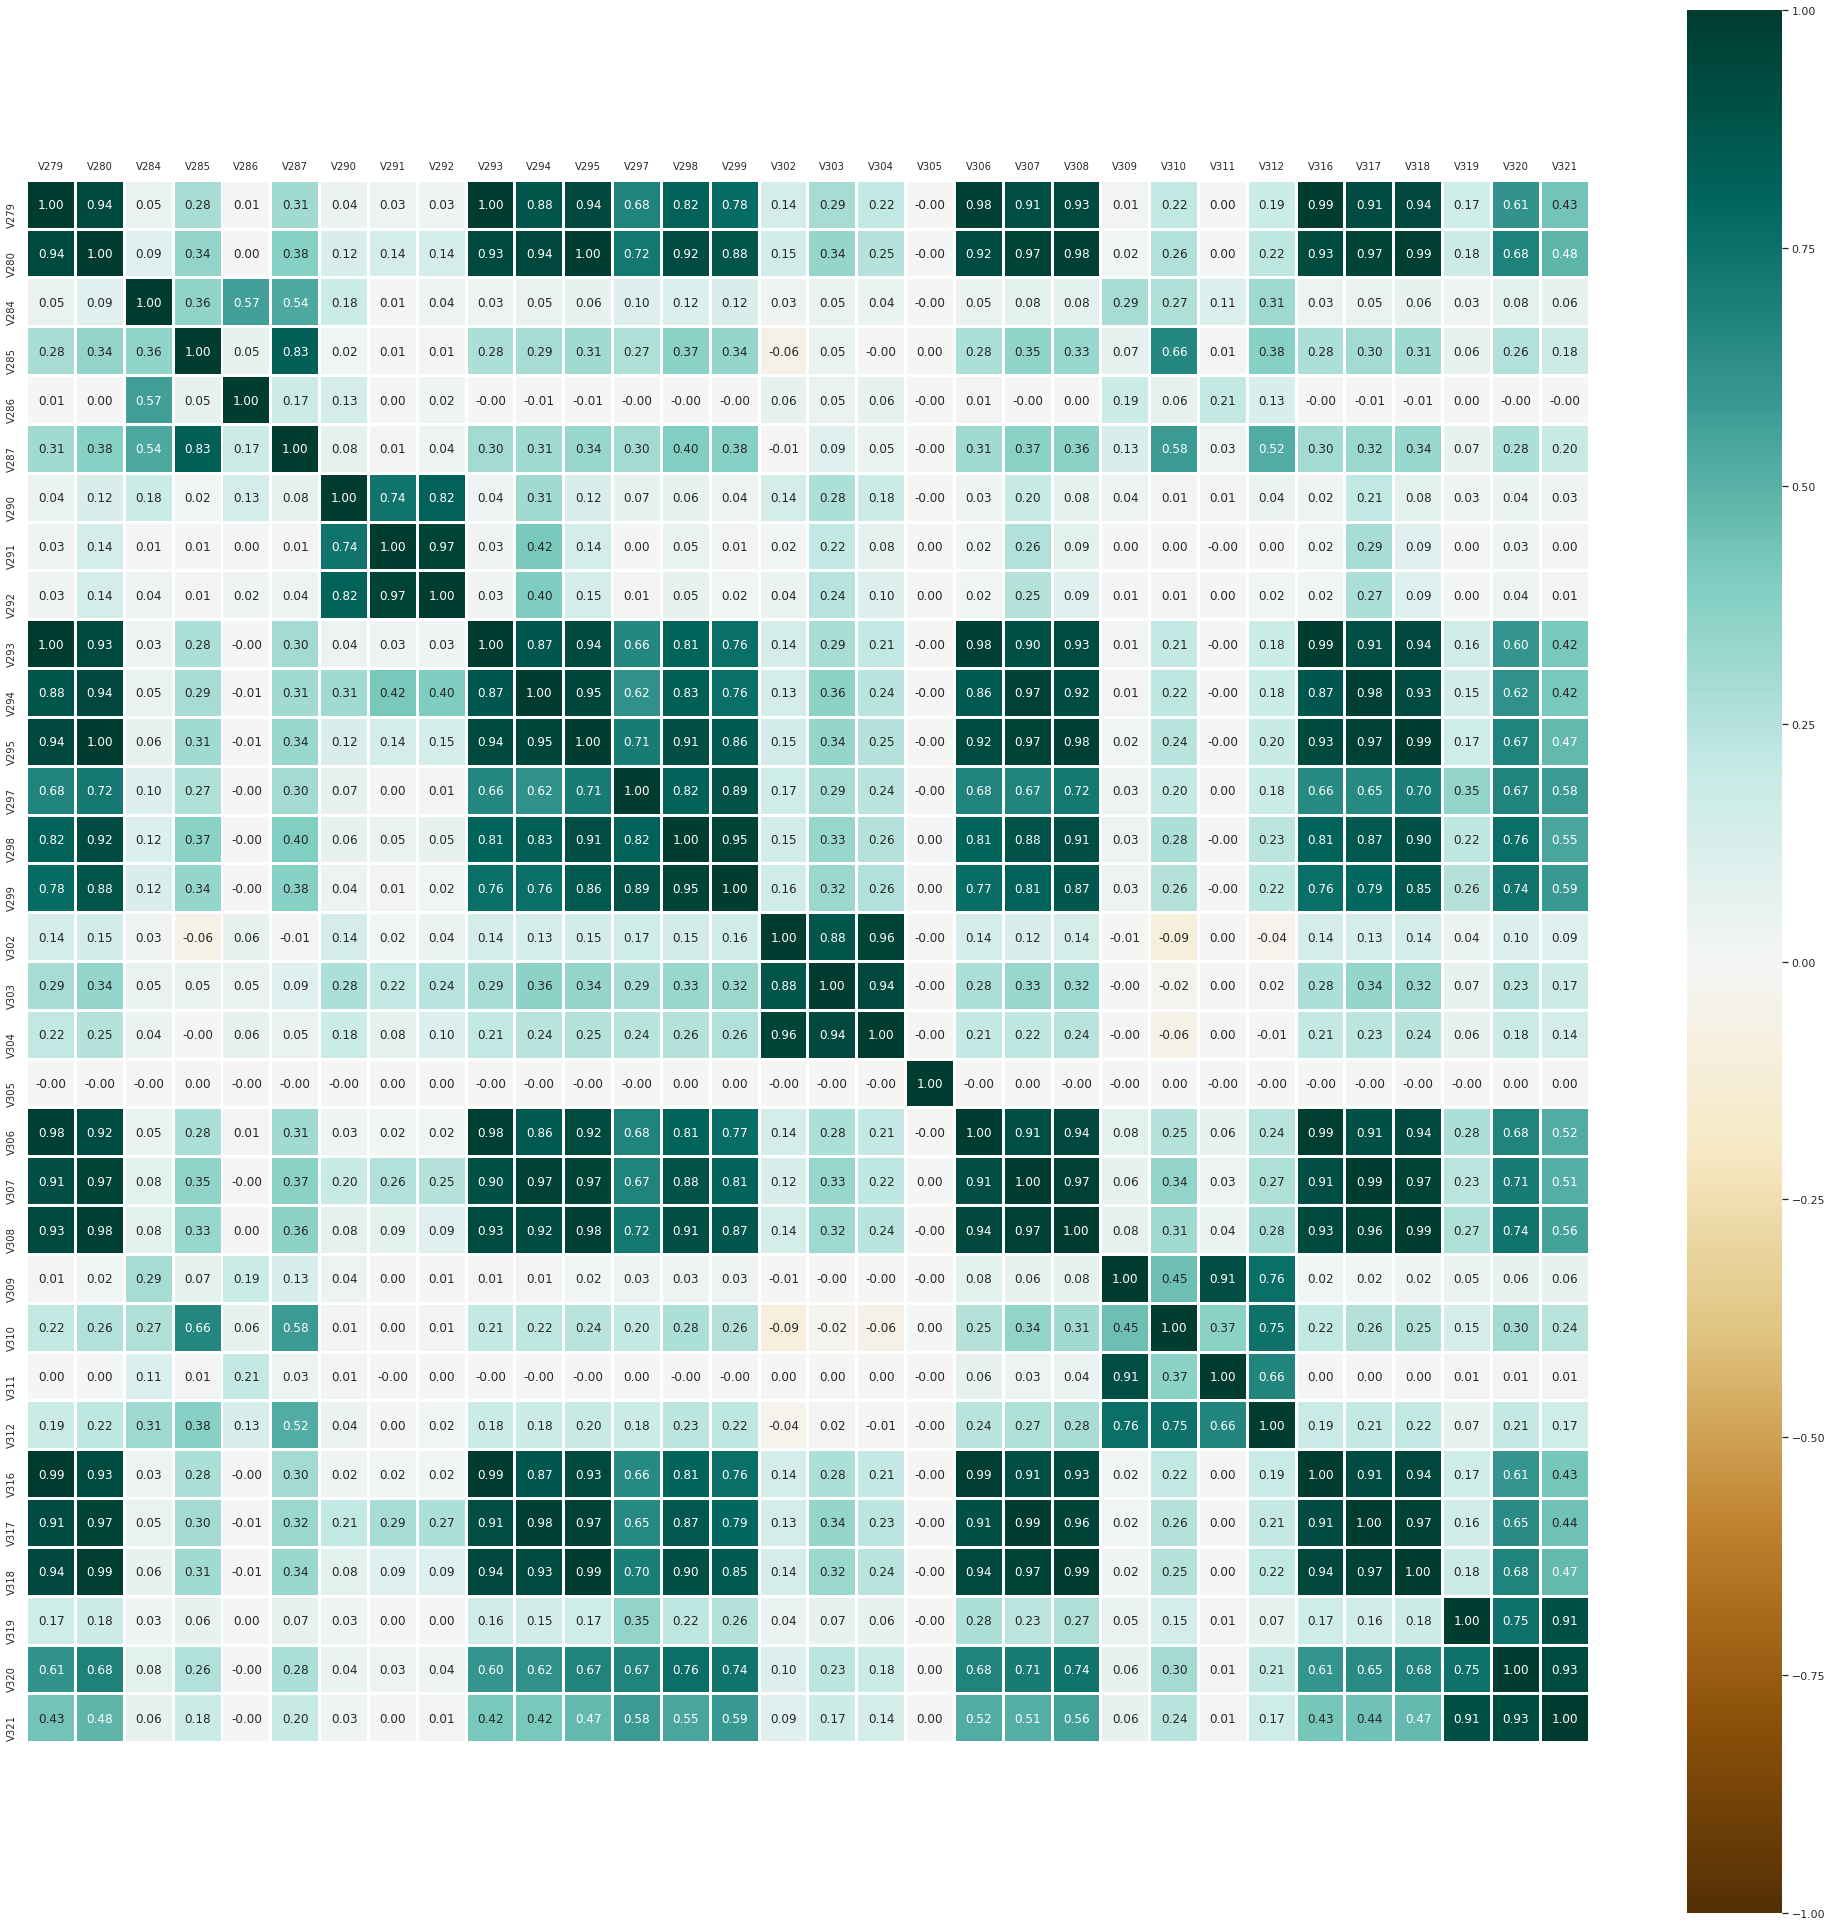

In [40]:
# 16 32 18
plt.figure( figsize=(35,35))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
show_corr(nans_groups[14])

In [41]:
gcorr = [
         ['V279', 'V280', 'V293', 'V294', 'V295', 'V298', 'V299', 'V306', 'V307', 'V308', 'V316', 'V317', 'V318'],
         ['V285', 'V287'], 
         ['V290', 'V291', 'V292'],
         ['V284'],
         ['V286'],
         ['V302', 'V303', 'V304'],
         ['V305'],
         ['V309', 'V311'],
         ['V310'],
         ['V312'],
         ['V319', 'V321', 'V320']
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V274', 'V267', 'V226', 'V223', 'V240', 'V244', 'V260', 'V261', 'V264', 'V268', 'V278', 'V222', 'V238', 'V251', 'V234', 'V220', 'V271', 'V307', 'V285', 'V291', 'V284', 'V286', 'V303', 'V305', 'V309', 'V310', 'V312', 'V320']


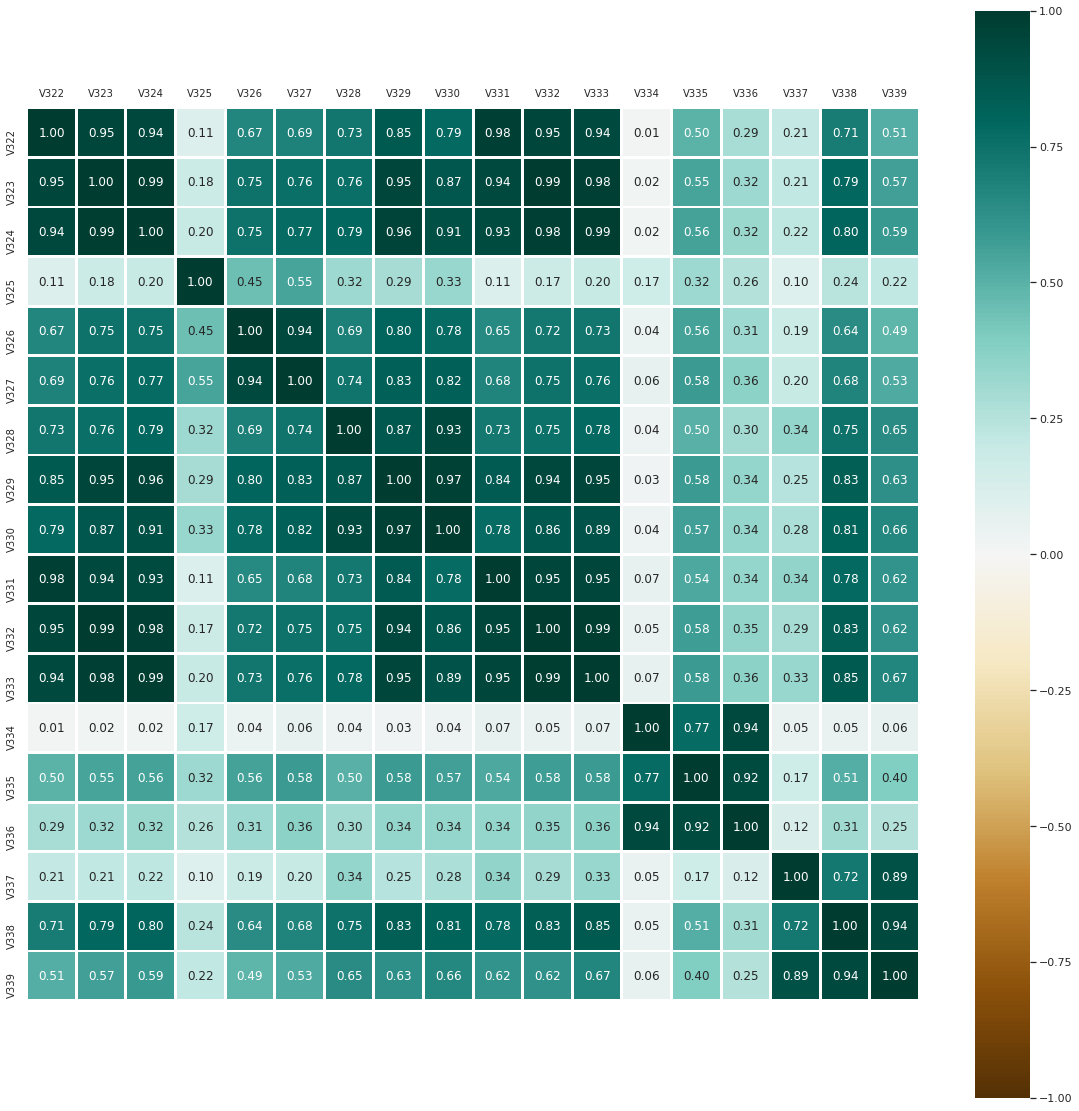

In [42]:
# 16 32 18
plt.figure( figsize=(20,20))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
show_corr(nans_groups[15])

In [45]:
gcorr = [
         ['V322', 'V323', 'V324', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V338', 'V337', 'V339'],
         ['V325'], 
         ['V326', 'V327'],
         ['V334', 'V334', 'V336'],
        ]

max_value_counts(gcorr, final_cols)
print(final_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V296', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V16', 'V14', 'V20', 'V24', 'V26', 'V28', 'V30', 'V48', 'V41', 'V36', 'V38', 'V40', 'V45', 'V47', 'V59', 'V65', 'V68', 'V54', 'V56', 'V62', 'V67', 'V70', 'V80', 'V88', 'V89', 'V76', 'V78', 'V82', 'V86', 'V91', 'V127', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V274', 'V267', 'V226', 'V223', 'V240', 'V244', 'V260', 'V261', 'V264', 'V268', 'V278', 'V222', 'V238', 'V251', 'V234', 'V220', 'V271', 'V307', 'V285', 'V291', 'V284', 'V286', 'V303', 'V305', 'V309', 'V310', 'V312', 'V320', 'V332', 'V325', 'V326', 'V336', 'V332', 'V325', 'V326', 'V336']


In [44]:
len(final_cols)

117

In [46]:
txn[final_cols]

D1  V281  V282  V283  V289  V296  V301   V314    D11   V1  \
TransactionID                                                                 
2987002          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0  315.0  1.0   
2987003        112.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    NaN  NaN   
2987005          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0    0.0  1.0   
2987006          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0    0.0  1.0   
2987008          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0    NaN  NaN   
...              ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
3577529          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0    NaN  NaN   
3577531          NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN  NaN   
3577537          0.0   0.0   1.0   1.0   0.0   0.0   0.0    0.0    0.0  1.0   
3577538         22.0   0.0   2.0   7.0   1.0   0.0   0.0  669.5   22.0  1.0   
3577539          0.0   0.0   2.0   2.0   0.0   1.0   1.0    0.0    0.0  1.0   

               ...   V312        V320  V332  V325  V326  V336  V332  V325  \
TransactionID  ...                                                          
2987002        ...    0.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
2987003        ...  135.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
2987005        ...    0.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
2987006        ...    0.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
2987008        ...    0.0    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
...            ...    ...         ...   ...   ...   ...   ...   ...   ...   
3577529        ...    0.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
3577531        ...    0.0    0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
3577537        ...    0.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
3577538        ...  117.0    0.000000   NaN   NaN   NaN   NaN   NaN   NaN   
3577539        ...    0.0  279.950012   NaN   NaN   NaN   NaN   NaN   NaN   

               V326  V336  
TransactionID              
2987002         NaN   NaN  
2987003         NaN   NaN  
2987005         NaN   NaN  
2987006         NaN   NaN  
2987008         0.0   0.0  
...             ...   ...  
3577529         NaN   NaN  
3577531         0.0   0.0  
3577537         NaN   NaN  
3577538         NaN   NaN  
3577539         NaN   NaN  

[354324 rows x 121 columns]

In [48]:
# Commented because figure is too large
# plt.figure( figsize=(40,40))
# show_corr(final_cols)

In [51]:
gcorr = [['V91', 'V70', 'V30', 'V48', 'V11'], ['V127', 'V296'], ['V89', 'V68', 'V28'], ['V65', 'V88', 'V41', 'V14'], ['V80', 'V59', 'V40']]

for g in gcorr:
    final_cols = [ f for f in final_cols if f not in g]
    gval = [len(txn[str(gg)].value_counts()) for gg in g]
    most_features_index = np.argmax(gval)
    final_cols.append( g[most_features_index] )
#     print( g[most_features_index] )
final_cols

['D1',
 'V281',
 'V282',
 'V283',
 'V289',
 'V301',
 'V314',
 'D11',
 'V1',
 'V3',
 'V4',
 'V6',
 'V8',
 'V16',
 'V20',
 'V24',
 'V26',
 'V36',
 'V38',
 'V45',
 'V47',
 'V54',
 'V56',
 'V62',
 'V67',
 'V76',
 'V78',
 'V82',
 'V86',
 'V98',
 'V107',
 'V99',
 'V108',
 'V111',
 'V115',
 'V118',
 'V120',
 'V121',
 'V123',
 'V131',
 'V130',
 'V136',
 'V138',
 'V139',
 'V142',
 'V147',
 'V156',
 'V162',
 'V143',
 'V160',
 'V165',
 'V166',
 'V203',
 'V207',
 'V173',
 'V205',
 'V215',
 'V169',
 'V201',
 'V171',
 'V174',
 'V175',
 'V180',
 'V185',
 'V188',
 'V198',
 'V210',
 'V209',
 'V274',
 'V267',
 'V226',
 'V223',
 'V240',
 'V244',
 'V260',
 'V261',
 'V264',
 'V268',
 'V278',
 'V222',
 'V238',
 'V251',
 'V234',
 'V220',
 'V271',
 'V307',
 'V285',
 'V291',
 'V284',
 'V286',
 'V303',
 'V305',
 'V309',
 'V310',
 'V312',
 'V320',
 'V332',
 'V325',
 'V326',
 'V336',
 'V332',
 'V325',
 'V326',
 'V336',
 'V30',
 'V127',
 'V89',
 'V65',
 'V80']

In [52]:
len(final_cols)

109

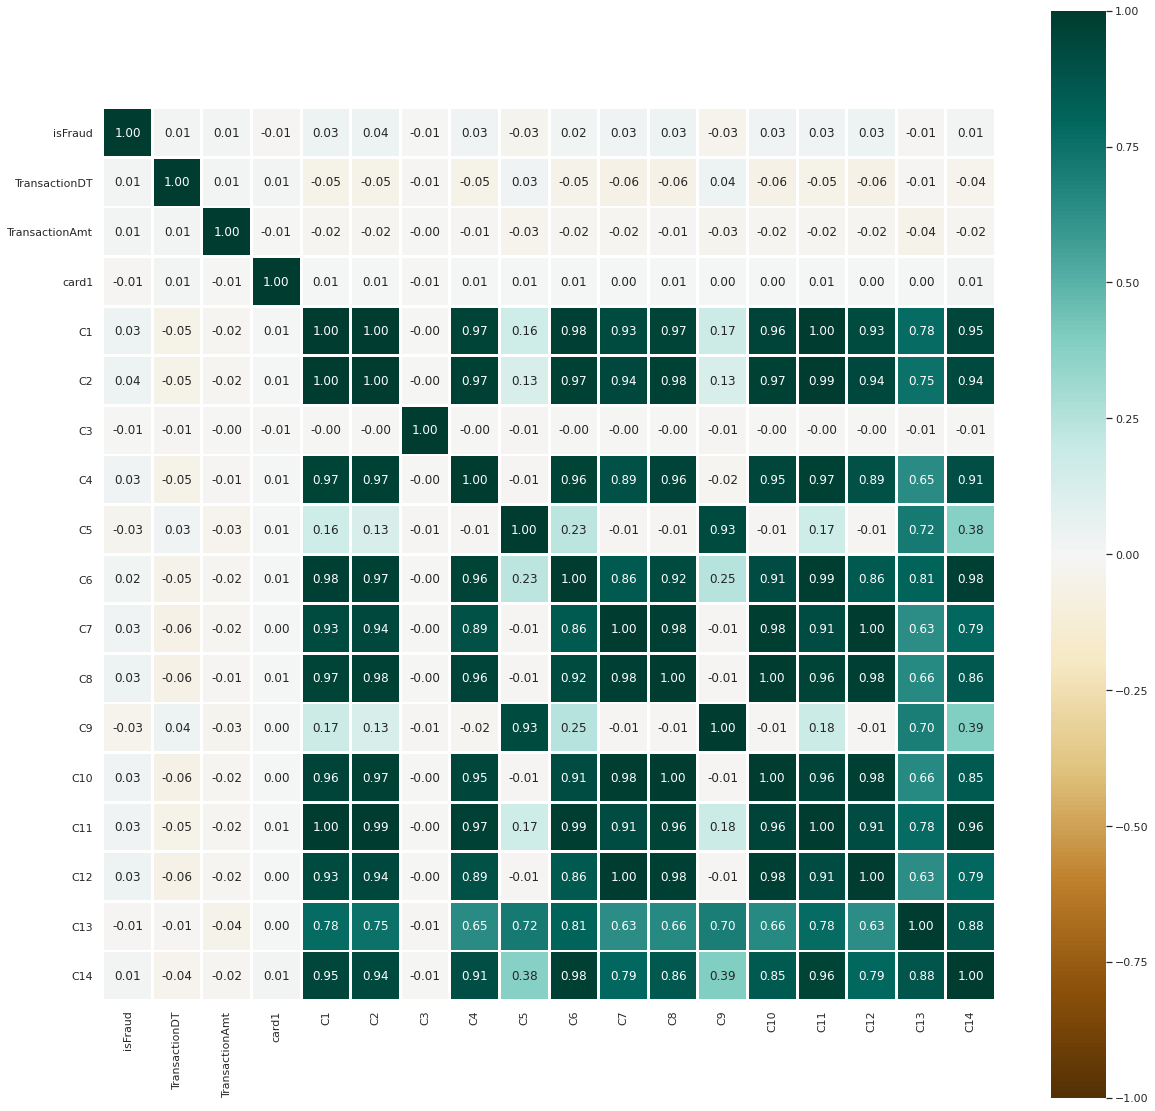

In [53]:
gcorr = ['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
plt.figure(figsize=(20, 20))
show_corr(gcorr)

In [54]:
gcorr = [ ['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14'], ['C3'], ['C5', 'C9']]
final_c_cols = []

max_value_counts(gcorr, final_c_cols)

In [55]:
final_c_cols

['C13', 'C3', 'C5']

In [56]:
import pprint as pp

pp.pprint(nans_dict)

{'0': ['isFraud',
       'TransactionDT',
       'TransactionAmt',
       'ProductCD',
       'card1',
       'C1',
       'C2',
       'C3',
       'C4',
       'C5',
       'C6',
       'C7',
       'C8',
       'C9',
       'C10',
       'C11',
       'C12',
       'C13',
       'C14'],
 '1000': ['card4'],
 '101743': ['D4'],
 '101774': ['V35',
            'V36',
            'V37',
            'V38',
            'V39',
            'V40',
            'V41',
            'V42',
            'V43',
            'V44',
            'V45',
            'V46',
            'V47',
            'V48',
            'V49',
            'V50',
            'V51',
            'V52'],
 '101936': ['M6'],
 '157985': ['D3'],
 '162794': ['M1', 'M2', 'M3'],
 '167714': ['D11',
            'V1',
            'V2',
            'V3',
            'V4',
            'V5',
            'V6',
            'V7',
            'V8',
            'V9',
            'V10',
            'V11'],
 '168770': ['D2'],
 '168882': ['M4'],


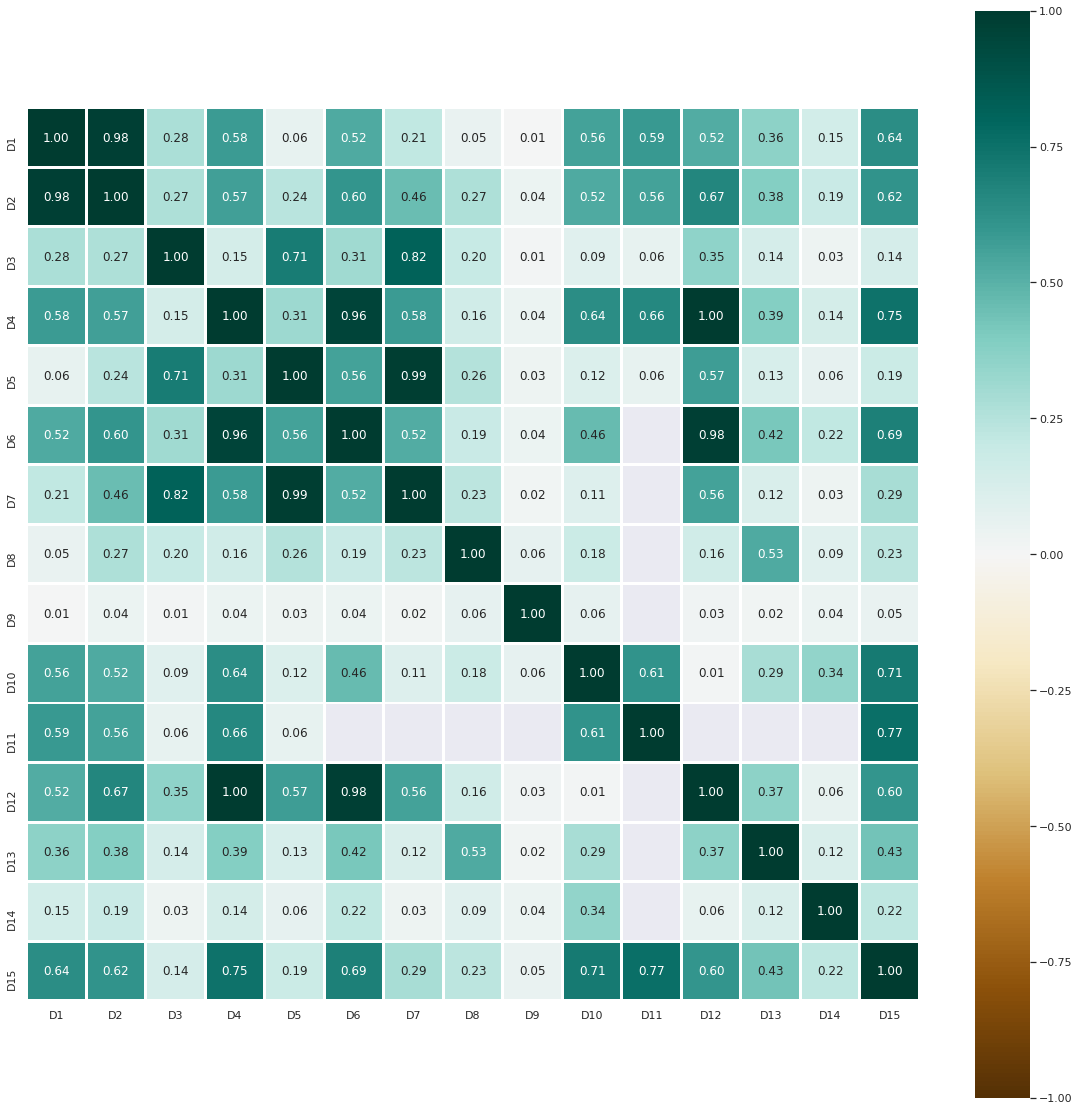

In [57]:
d = [ 'D' + str(i) for i in range(1,16)]
d
plt.figure( figsize = (20, 20))
show_corr(d)

In [58]:
gcorr = [['D3', 'D5', 'D7'], ['D4', 'D6', 'D12'], ['D8'], ['D9'], ['D10'], ['D15'], ['D13'], ['D14'] ]
final_d_cols = []

max_value_counts(gcorr, final_d_cols)

In [59]:
final_d_cols

['D5', 'D6', 'D8', 'D9', 'D10', 'D15', 'D13', 'D14']

In [60]:
for l in nans_dict.values():
    if len(l) <= 3:
        print(l)

['card2']
['card3']
['card4']
['card5']
['card6']
['addr1', 'addr2']
['dist1']
['dist2']
['P_emaildomain']
['R_emaildomain']
['D2']
['D3']
['D4']
['D5']
['D6']
['D7']
['D8', 'D9']
['D10']
['D12']
['D13']
['D14']
['D15']
['M1', 'M2', 'M3']
['M4']
['M5']
['M6']
['M7']
['M8', 'M9']


In [61]:
final_cols

['D1',
 'V281',
 'V282',
 'V283',
 'V289',
 'V301',
 'V314',
 'D11',
 'V1',
 'V3',
 'V4',
 'V6',
 'V8',
 'V16',
 'V20',
 'V24',
 'V26',
 'V36',
 'V38',
 'V45',
 'V47',
 'V54',
 'V56',
 'V62',
 'V67',
 'V76',
 'V78',
 'V82',
 'V86',
 'V98',
 'V107',
 'V99',
 'V108',
 'V111',
 'V115',
 'V118',
 'V120',
 'V121',
 'V123',
 'V131',
 'V130',
 'V136',
 'V138',
 'V139',
 'V142',
 'V147',
 'V156',
 'V162',
 'V143',
 'V160',
 'V165',
 'V166',
 'V203',
 'V207',
 'V173',
 'V205',
 'V215',
 'V169',
 'V201',
 'V171',
 'V174',
 'V175',
 'V180',
 'V185',
 'V188',
 'V198',
 'V210',
 'V209',
 'V274',
 'V267',
 'V226',
 'V223',
 'V240',
 'V244',
 'V260',
 'V261',
 'V264',
 'V268',
 'V278',
 'V222',
 'V238',
 'V251',
 'V234',
 'V220',
 'V271',
 'V307',
 'V285',
 'V291',
 'V284',
 'V286',
 'V303',
 'V305',
 'V309',
 'V310',
 'V312',
 'V320',
 'V332',
 'V325',
 'V326',
 'V336',
 'V332',
 'V325',
 'V326',
 'V336',
 'V30',
 'V127',
 'V89',
 'V65',
 'V80']

In [62]:
final_c_cols

['C13', 'C3', 'C5']

In [63]:
final_d_cols

['D5', 'D6', 'D8', 'D9', 'D10', 'D15', 'D13', 'D14']

In [64]:
vcd_cols = final_cols + final_c_cols + final_d_cols
print(vcd_cols)

['D1', 'V281', 'V282', 'V283', 'V289', 'V301', 'V314', 'D11', 'V1', 'V3', 'V4', 'V6', 'V8', 'V16', 'V20', 'V24', 'V26', 'V36', 'V38', 'V45', 'V47', 'V54', 'V56', 'V62', 'V67', 'V76', 'V78', 'V82', 'V86', 'V98', 'V107', 'V99', 'V108', 'V111', 'V115', 'V118', 'V120', 'V121', 'V123', 'V131', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V143', 'V160', 'V165', 'V166', 'V203', 'V207', 'V173', 'V205', 'V215', 'V169', 'V201', 'V171', 'V174', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209', 'V274', 'V267', 'V226', 'V223', 'V240', 'V244', 'V260', 'V261', 'V264', 'V268', 'V278', 'V222', 'V238', 'V251', 'V234', 'V220', 'V271', 'V307', 'V285', 'V291', 'V284', 'V286', 'V303', 'V305', 'V309', 'V310', 'V312', 'V320', 'V332', 'V325', 'V326', 'V336', 'V332', 'V325', 'V326', 'V336', 'V30', 'V127', 'V89', 'V65', 'V80', 'C13', 'C3', 'C5', 'D5', 'D6', 'D8', 'D9', 'D10', 'D15', 'D13', 'D14']


In [65]:
len(vcd_cols)

120

In [120]:
txn = pd.read_csv('../input/frauddetect/train_transaction.csv', index_col='TransactionID')

# Categorical Features

In [66]:
#     ProductCD
#     card1 - card6
#     addr1, addr2
#     P_emaildomain
#     R_emaildomain
#     M1 - M9
cat_cols = ['ProductCD', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2'] + ['card' + str(i) for i in range(1, 7)] + ['M' + str(i) for i in range(1, 10)]
cat_cols

['ProductCD',
 'P_emaildomain',
 'R_emaildomain',
 'addr1',
 'addr2',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [70]:
%config Completer.use_jedi = False

In [121]:
txn.loc[ txn['P_emaildomain'].isin(['gmail', 'gmail.com']),'P_emaildomain'] = 'Google'
txn.loc[ txn['P_emaildomain'].isin(['yahoo.fr', 'yahoo.es', 'yahoo.de', 'yahoo.com.mx', 'yahoo.com', 'yahoo.co.uk', 'yahoo.co.jp']),'P_emaildomain'] = 'Yahoo'
txn.loc[ txn['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de','outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
txn.loc[ txn['P_emaildomain'].isin(['anonymous.com']), 'P_emaildomain'] = 'Anon'

### proton mail ka info can be highlighted

In [122]:
# other category
fraud_p_domain = (txn.groupby('P_emaildomain').isFraud.sum()/txn.groupby('P_emaildomain').isFraud.count()).sort_values(ascending=False)
# arbitrary threshold 0.02
fraud_p_domain_list = list(fraud_p_domain[ fraud_p_domain > 0.02].index)
fraud_p_domain_list

['protonmail.com',
 'mail.com',
 'aim.com',
 'Microsoft',
 'embarqmail.com',
 'Google',
 'mac.com',
 'cableone.net',
 'icloud.com',
 'bellsouth.net',
 'comcast.net',
 'suddenlink.net',
 'charter.net',
 'frontier.com',
 'frontiernet.net',
 'ymail.com',
 'Anon',
 'Yahoo',
 'aol.com']

In [123]:
txn.loc[ txn['R_emaildomain'].isin(['gmail', 'gmail.com']),'R_emaildomain'] = 'Google'
txn.loc[ txn['R_emaildomain'].isin(['yahoo.fr', 'yahoo.es', 'yahoo.de', 'yahoo.com.mx', 'yahoo.com', 'yahoo.co.uk', 'yahoo.co.jp']),'R_emaildomain'] = 'Yahoo'
txn.loc[ txn['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de','outlook.es', 'live.com', 'live.fr','hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
# txn.R_emaildomain.value_counts()

In [124]:
fraud_r_domain = (txn.groupby('R_emaildomain').isFraud.sum()/txn.groupby('R_emaildomain').isFraud.count()).sort_values(ascending=False)
fraud_r_domain_list = list(fraud_r_domain[ fraud_r_domain > 0.04].index)
fraud_r_domain_list

['protonmail.com',
 'mail.com',
 'netzero.net',
 'icloud.com',
 'Google',
 'Microsoft',
 'suddenlink.net',
 'charter.net',
 'ymail.com',
 'rocketmail.com',
 'aim.com',
 'Yahoo',
 'earthlink.net']

In [144]:
email_fraud_perc = (txn.groupby('R_emaildomain').isFraud.sum()/txn.groupby('R_emaildomain').isFraud.count())
email_fraud_perc = pd.DataFrame(email_fraud_perc)

In [145]:
email_fraud_perc

isFraud
R_emaildomain             
Google            0.119979
Microsoft         0.082213
Yahoo             0.045526
aim.com           0.047619
anonymous.com     0.029466
aol.com           0.033304
att.net           0.000000
bellsouth.net     0.003968
cableone.net      0.000000
centurylink.net   0.000000
cfl.rr.com        0.000000
charter.net       0.051282
comcast.net       0.011786
cox.net           0.033835
earthlink.net     0.043478
embarqmail.com    0.000000
frontier.com      0.000000
frontiernet.net   0.000000
gmx.de            0.000000
icloud.com        0.121749
juno.com          0.000000
mac.com           0.015504
mail.com          0.426471
me.com            0.020290
netzero.com       0.000000
netzero.net       0.166667
optonline.net     0.009259
prodigy.net.mx    0.000000
protonmail.com    0.923077
ptd.net           0.000000
q.com             0.000000
roadrunner.com    0.000000
rocketmail.com    0.048780
sbcglobal.net     0.000000
sc.rr.com         0.000000
scranton.edu      0.000000
servicios-ta.com  0.000000
suddenlink.net    0.071429
twc.com           0.000000
verizon.net       0.000000
web.de            0.000000
windstream.net    0.000000
ymail.com         0.050725

In [146]:
email_fraud_perc = email_fraud_perc.reset_index()

In [147]:
email_fraud_perc = email_fraud_perc.sort_values('isFraud', ascending=False)

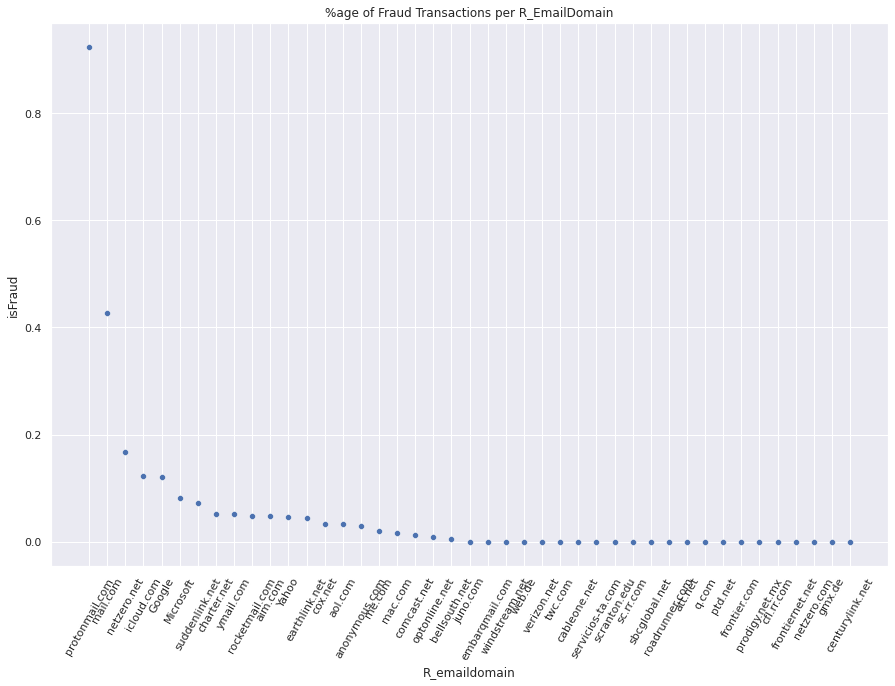

In [148]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
plt.title('%age of Fraud Transactions per R_EmailDomain')
sns.scatterplot(x='R_emaildomain', y='isFraud', data=email_fraud_perc)

#### addr: address(both addresses are for purchaser)

- addr1 as billing region
- addr2 as billing country”

In [149]:
txn[['addr1', 'addr2', 'isFraud']].groupby(['addr1', 'addr2']).isFraud.sum().sort_values(ascending = False)

addr1  addr2
204.0  87.0     671
325.0  87.0     656
299.0  87.0     581
330.0  87.0     540
264.0  87.0     439
               ... 
332.0  60.0       0
333.0  16.0       0
337.0  40.0       0
       96.0       0
100.0  31.0       0
Name: isFraud, Length: 358, dtype: int64

In [150]:
(txn[['addr1', 'addr2', 'isFraud']].groupby(['addr2']).isFraud.sum()).sort_values(ascending=False)

addr2
87.0     7499
60.0      172
96.0       52
65.0       27
10.0        4
         ... 
62.0        0
61.0        0
59.0        0
101.0       0
57.0        0
Name: isFraud, Length: 64, dtype: int64

In [151]:
txn[['addr1', 'addr2', 'isFraud']].groupby(['addr1']).isFraud.sum().sort_values(ascending = False)

addr1
204.0    671
325.0    656
299.0    581
330.0    540
264.0    439
        ... 
349.0      0
347.0      0
346.0      0
345.0      0
100.0      0
Name: isFraud, Length: 271, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
txn.addr1.value_counts(dropna=False)

In [ ]:
txn.addr2.value_counts(dropna=False)

In [153]:
addr1_other_list = list(txn.addr1.value_counts()[txn.addr1.value_counts() > 5000 ].index)
addr1_other_list

[299.0,
 325.0,
 204.0,
 264.0,
 330.0,
 315.0,
 441.0,
 272.0,
 123.0,
 126.0,
 184.0,
 337.0,
 191.0,
 181.0,
 143.0,
 476.0,
 310.0,
 327.0,
 472.0]

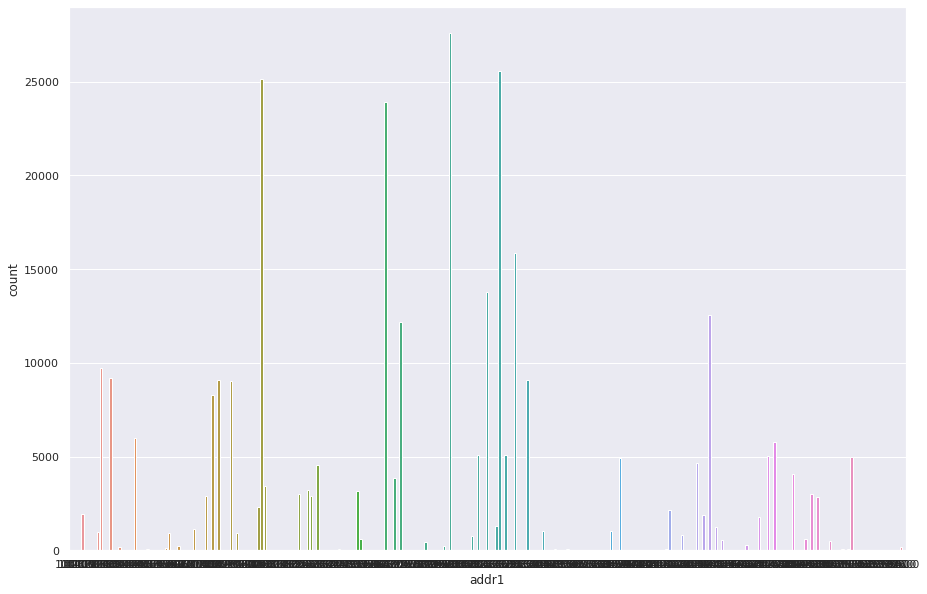

In [158]:
plt.figure(figsize=(25,15))
sns.countplot(x='addr1', data=txn)

In [154]:
addr2_other_list = list(txn.addr2.value_counts()[txn.addr2.value_counts() > 50 ].index)
addr2_other_list

[87.0, 60.0, 96.0, 32.0, 65.0]

In [ ]:
txn.loc[txn.addr1.isin(addr1_other_list), 'addr1']

In [ ]:
txn.loc[txn.addr2.isin(addr2_other_list), 'addr2']

In [ ]:
# txn.loc[txn.addr1.isin(addr1_other_list), 'addr1'] = "Others"
# txn.addr1.fillna('Others', inplace=True)
# txn.loc[txn.addr2.isin(addr2_other_list), 'addr2'] = "Others"
# txn.addr2.fillna('Others', inplace=True)
# txn

In [ ]:
txn.loc[txn.addr2.isin(addr2_other_list), 'addr2'] = "Others"

In [ ]:
txn.addr2.isna().sum()
txn.addr2.fillna('Others', inplace = True)
txn.isna().sum()

In [ ]:
lol3 = txn.addr2

In [ ]:
for i in lol3.head(10):
    print(type(i))

lol3 = lol3.astype(str)

for i in lol3.head(10):
    print(type(i))

In [ ]:
txn.addr2 = txn.addr2.astype(str)

In [ ]:
for i in txn.addr2.head(10):
    print(type(i))

In [ ]:
txn.addr2.head(50)

In [ ]:
txn.loc[txn.addr1.isin(addr1_other_list), 'addr1'] = 'Others'

In [ ]:
txn.addr1.value_counts(dropna=0)
txn.addr1.fillna('Others', inplace=True)

In [ ]:
txn[cat_cols].isna().sum()

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
reduce_mem_usage(txn)

In [ ]:
txn.memory_usage().sum()/1e8

In [ ]:
v = ["V" + str(i) for i in range(1, 339)]
v
c = ["C" + str(i) for i in range(1, 15)]
c
d = ["D" + str(i) for i in range(1, 16)]
d

In [ ]:
vcd = v + c +d
vcd

In [ ]:
vcd_cols

In [ ]:
drop_vcd = [ col for col in vcd if col not in vcd_cols ]
print(drop_vcd)

In [ ]:
len(drop_vcd)

In [ ]:
txn_cols = txn.columns
txn_cols

In [ ]:
display(txn.shape)
txn = txn.drop( drop_v, axis = 1)
display(txn.shape)

In [ ]:
import gc
gc.collect()

In [ ]:
txn.shape

In [ ]:
txn

In [ ]:
display(txn)

In [ ]:
txn.dtypes.value_counts()

In [ ]:
txn.dtypes[txn.dtypes=='category']

In [ ]:
txn.isna().sum()

In [ ]:
m = ['M' + str(i) for i in range(1,10)]

In [ ]:
m

In [ ]:
txn[m + ['isFraud']]

In [ ]:
['isFraud'].append('lol')

In [ ]:
m_encode = {'T' : 1, 'F' : 0, 'M0' : 0 , 'M1' : 1, 'M2' : 2}
txn[m] = txn[m].replace(m_encode)
txn[m]

In [ ]:
for i in m:    
    display( txn[ [i, 'isFraud']].value_counts().sort_index() )

In [ ]:
txn

In [ ]:
card = ["card" + str(i) for i in range(1, 7)]
card

### Discover seems to be the least safe

In [ ]:
# card1 can be binned later
for i in card:
    display( txn[ [i, 'isFraud']].value_counts().sort_index() )

In [ ]:
# depending on safety
card_encode = { 'american express' : 3, 'discover' : 4, 'mastercard' : 2, 'visa' : 1, 'credit' : 0, 'debit' : 1, 'charge card' : 3, 'debit or credit' : 4}
txn[card] = txn[card].replace(card_encode)

In [ ]:
txn[cat_cols]

In [ ]:
plt.figure( figsize = (10, 10) )
show_corr(m)

In [ ]:
plt.figure( figsize = (12, 12) )
show_corr(card)

In [ ]:
txn

In [ ]:
cat_list = list(txn.dtypes[ txn.dtypes == 'category'].index)
cat_list

In [ ]:
txn_y = txn.sort_values('TransactionDT').isFraud
txn_y

In [ ]:
txn_X = txn.sort_values('TransactionDT').drop('isFraud', axis = 1)
txn_X

In [ ]:
for i in txn_X.addr1:
    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), cat_list)], remainder='passthrough')

txn_X = np.array(columnTransformer.fit_transform(txn_X))
txn_X

# Train Identity

In [ ]:
idt = pd.read_csv('../input/frauddetect/train_identity.csv')

In [ ]:
#id_31
def browser_version(lst):
    
    r = re.compile('[0-9][0-9]|[0-9]\.[0-9]')
    final = []
    
    browser = ""
    version = ""
    browser_list = ['firefox', 'chrome', 'ie', 'edge', 'safari', 'samsung browser', 'facebook', 'opera']
    
    for i in lst:
        
        if pd.isnull(i):
            final.append('misc')
        else:
            for br in browser_list:
                if br in i.lower():
                    browser = br
                    break
            ver = r.search(i)
            if ver:
                version = ver.group()
            else:
                version = 'generic'
    
            final.append( str(browser) )
    
    valid = pd.DataFrame( [final, lst], index = ['new', 'old']).T
    
    return valid

def device_info(dinfo):
    brand_count = []

    for i in dinfo:
        if str(i) == 'nan':
            brand_count.append('other')
        elif 'hisense' in i.lower():
            brand_count.append('hisense')
        elif 'sm' in i.lower() or 'samsung' in i.lower() or i.lower()[:2] in ['gt', 'sc', 'sg', 'sg', 'sp']:
            brand_count.append('samsung')
        elif 'moto' in i.lower() or 'xt' in i.lower():
            brand_count.append('moto')
        elif 'lg' in i.lower() or i.lower()[:2] in ['vs']:
            brand_count.append('lg')
        elif 'trident' in i.lower():
            brand_count.append('trident')
        elif 'huawei' in i.lower() or i.lower()[:2] in ['hi']:
            brand_count.append('huawei')
        elif 'lenovo' in i.lower():
            brand_count.append('lenovo')
        elif 'rv' in i.lower():
            brand_count.append('rv')
        elif 'mac' in i.lower() or 'ios' in i.lower():
            brand_count.append('apple')
        elif 'htc' in i.lower():
            brand_count.append('htc')
        elif 'asus' in i.lower():
            brand_count.append('asus')
        elif 'windows' in i.lower() or 'rv:11.0' in i.lower():
            brand_count.append('windows')
        elif 'blade' in i.lower():
            brand_count.append('blade')
        elif 'mi' in i.lower():
            brand_count.append('xiaomi')
        elif 'linux' in i.lower():
            brand_count.append('linux')
        elif 'sony' in i.lower() or i.lower()[:2] in ['d5', 'd6', 'e2', 'e5', 'e6', 'f3', 'f5', 'f8', 'g3', 'g6', 'g8', 'h3', 'h5']:
            brand_count.append('sony')
        elif 'pixel' in i.lower() or 'nexus' in i.lower():
            brand_count.append('google')
        elif i.lower()[:2] in ['50', '60', '70', '80', '90'] or 'alcatel' in i.lower() or i.lower()[:4] in ['one ']:
            brand_count.append('alcatel')
        elif 'ilium' in i.lower():
            brand_count.append('ilium')
        elif i.lower()[:2] in ['kf']:
            brand_count.append('kindle')
        elif i.lower()[:2] in ['ta']:
            brand_count.append('nokia')
        elif i.lower()[:2] in ['z4', 'z5', 'z7', 'z8', 'z9'] or 'zte' in i.lower():
            brand_count.append('zte')
        else:
            brand_count.append('other')
            
    return brand_count

#id_33
def resolutions( res ):
    
    def bins():
        resolutions = {
            'NA': -10,
            'SD' : 0,
            'HD' : 1280*720,
            'FHD' : 1920*1080,
            'QHD' : 2560*1440,
            '4K' : 3840*2160,
            '5K' : 5120*2880,
        }

        bins = list(resolutions.values())
        bins += [150000000]
        labels = list(resolutions.keys())
        
        return bins, labels
    
    def parse_res( res ):
        
        if pd.isnull(res):
            return -1
        mul = res.find('x')
        h = res[0:mul]
        w = res[mul+1:]
        
        return ( int(w) * int(h) )

    res = [parse_res(i) for i in res]

    bins, labels = bins()
    res = pd.cut( res, bins = bins, labels = labels)
    
    return res


def bin13(id13):
    
    id13 = id13.fillna(-1)
    
    bins = [-10, 0, 25, 50, 100]
    labels = ['a', 'b', 'c', 'd']
    
    id13 = pd.cut( id13, bins = bins, labels = labels )
    
    return id13


def preprocess(dd, drop_list=None):
    
    # >90% Null Values
    drop_list = [ 'id_18', 'id_21', 'id_22', 'id_23', 'id_26', 'id_27', 'id_07', 'id_08', 'id_25', 'id_24', 'id_30']
    dd = dd.drop(drop_list, axis = 1)
    
    #Device Type
    lol = dd[['id_31', 'DeviceType']]
    for index, row in lol.iterrows():
        if not pd.isnull(row.id_31) and pd.isnull(row.DeviceType):
            if row.id_31 == 'ie 11.0 for desktop':
                row.DeviceType = 'desktop'
    
    #id_31
    final = browser_version( list(dd.id_31) )
    lol.id_31.loc[:] = final.new.loc[:]
    dd[['id_31', 'DeviceType']] = lol[['id_31', 'DeviceType']]
    dd.DeviceType = dd.DeviceType.fillna('desktop')
    
    #Device Info
    brand_count = device_info( list(dd.DeviceInfo) )
    dd.DeviceInfo = brand_count
    
    #id_33
    res = dd.id_33
    res = resolutions(res)
    dd.id_33 = res
    
    #id_13
    id_13 = dd.id_13
    id_13 = bin13(id_13)
    dd.id_13 = id_13
    
    #id_16
#     dd.id_16 = dd.id_16.fillna('NotFound')
    
#     #id_15
#     dd.id_15 = dd.id_15.fillna('Unknown')
    
#     #id_35,36,37,38
#     dd.id_35 = dd.id_35.fillna('F')
#     dd.id_36 = dd.id_36.fillna('F')
#     dd.id_37 = dd.id_37.fillna('T')
#     dd.id_38 = dd.id_38.fillna('F')
    
#     #id_28, 29
#     dd.id_28 = dd.id_28.fillna('New')
#     dd.id_29 = dd.id_29.fillna('NotFound')
    
#     #id_02
#     id2 = dd.id_02
#     id2 = id2.fillna(id2.mean())
#     dd.id_02 = id2
    
#     #id_05, id_06
#     dd.id_05 = dd.id_05.fillna(0)
#     dd.id_06 = dd.id_06.fillna(0)
    
#     #id_11
#     dd.id_11 = dd.id_11.fillna(100.0)
    
#     #id_17, id_19, id_20
#     dd.id_17 = dd.id_17.fillna( dd.id_17.mean() )
#     dd.id_19 = dd.id_19.fillna( dd.id_19.mean() )
#     dd.id_20 = dd.id_20.fillna( dd.id_20.mean() )
    
    display(dd)
    return dd

In [ ]:
import re
drop_list = [ 'id_18', 'id_21', 'id_22', 'id_23', 'id_26', 'id_27', 'id_07', 'id_08', 'id_25', 'id_24', 'id_30', 'id_14', 'id_34', 'id_32', 'id_03', 'id_04', 'id_09', "id_10" ]
cat = ['id_12', 'id_13', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_33', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
idt = preprocess(idt, drop_list)

In [ ]:
obj_list = list(idt.dtypes[ idt.dtypes == 'object'].index)
obj_list

In [ ]:
for i in obj_list:
    print( idt[i].value_counts() )

In [ ]:
idt

In [ ]:
idt[obj_list]

In [ ]:
lol = idt

In [ ]:
lol.isna().sum()

In [ ]:
lol = lol.fillna(np.nan)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), obj_list)], remainder='passthrough')

lol = np.array(columnTransformer.fit_transform(lol))
lol

# Test Data

In [ ]:
test_txn = pd.read_csv('../input/frauddetect/test_transaction.csv', index_col = 'TransactionID')
test_txn